# Preamble

Load necessary packages and the lab data

In [186]:
from matplotlib import pyplot
import matplotlib
import numpy
import scipy
import pickle
import pandas
from IPython.display import Markdown

with open('Lab3.pkl', 'rb') as f:
    Lab3_Data, Lab3_Problem1_demo, Lab3_Problem2, Lab3_synthetic_identities = pickle.load(f)

    
    
# The following are helper functions to facilitate printing outputs in the lab without interfering with the autograder. Don't concern yourself with those functions, but keep them in your submission.
def safe_print_err(e, locals=locals(), globals=globals()):
    locals = locals or {}
    globals = globals or {}
    __problem = eval('__problem', locals, globals)
    err_msg = str(e)
    if type(e) in (NameError, KeyError):
        var_name_split = str(e).split("'")
        if len(var_name_split) > 1:
            var_name = var_name_split[1]
            err_msg = f"'{var_name}' is not defined."
        
    display(Markdown(f"<div class='alert alert-block alert-danger'><b>Error in problem {__problem}</b>: {err_msg}</div>"))
    
def print_mk(msg):
    display(Markdown(msg))

---

# Data Description

The dataset we will be using this lab is the 2015-2016 portion of the National Health and Nutrition Examination Survey. The dataset and its documentation may be found at https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015.

We will be using a small subset of the dataset, compiled in the variable `Lab3_Data`, which is a data frame (for documentation [click here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.htmlhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)). Here is a general description of the columns in the data frame (we use the terms **data frame** and **table** interchangeably in this lab):

- `Subject_ID`: this is a sequence number, assigned uniquely to each respondent.
- `Gender`: this is the gender of the subject. 1=Male, 2=Female.
- `Age`: this is the age, in years, of the subject.
- `Marital_Status`: this representes the marital status of the subject.
| `Marital_Status` | Value Description |
| :- | :- |
| $1$ | Married |
| $2$ | Widowed |
| $3$ | Divorced |
| $4$ | Separated |
| $5$ | Never married |
| $6$ | Living with partner |
| $77$ | Refused |
| $99$ | Don't know |
| NaN | Missing|
- `Country_Birth`: the country where the subject was born.<br>
| `Country_Birth` | Value Description |
| :- | :- |
| $1$ | Born in 50 US states or Washington, DC |
| $2$ | Others |
| $77$ | Refused |
| $99$ | Don't know |
| NaN | Missing|
- `Race`: the race of the subject.<br>
| `Race` | Value Description |
| :- | :- |
| $1$ | Mexican American |
| $2$ | Other Hispanic |
| $3$ | Non-Hispanic White |
| $4$ | Non-Hispanic Black |
| $6$ | Non-Hispanic Asian |
| $7$ | Other Race - Including Multi-Racial |
| NaN | Missing |
- `Alcohol_Average`: The response to the question: "In the past 12 months, on those days that you drank alcoholic beverages, on the average, how many drinks did you have? By a drink, I mean a 12 oz. beer, a 5 oz. glass of wine, or one and a half ounces of liquor."
| `Alcohol_Average` | Value Description |
| :- | :- |
| $1$ to $14$ | Range of Values |
| $15$ | $15$ drinks or more |
| $777$ | Refused |
| $999$ | Don't know |
| NaN | Missing |
- `LDL_Cholesterol`: The subject's low density lipoprotein cholesterol in units of milligrams per deciliter (mg/dL).
- `HDL_Cholesterol`: The subject's high density lipoprotein cholesterol in units of milligrams per deciliter (mg/dL).
- `Total_Cholesterol`: The subject's total cholesterol level in units of milligrams per deciliter (mg/dL).
- `Sys_Blood_Pressure`: The subject's systolic blood pressure (average of 3 readings) in units of millimeters of mercury (mm Hg).

---

# Before We Start (Please Read)
## Function Pointers

A specification of Python that we will be using in this lab is passing a function as a parameter to another function. In order to achieve this, we utilize function pointetrs.
A function name is just a pointer to the function itself. For example:

In [187]:
numpy.median

<function median at 0x0000020417EC06B0>

Which doesn't evaluate the function `numpy.median` but rather represents a reference to the function `numpy.median` as an object.
This can be particularly useful if we would like to pass the function `numpy.median` to another function, or store it in a variable.
For instance, a function pointer can be stored in a variable:

In [188]:
my_fcn_ptr_1 = numpy.median

The variable `my_fcn_ptr_1` holds a reference to the function `numpy.median`:

In [189]:
my_fcn_ptr_1

<function median at 0x0000020417EC06B0>

From this moment, the variable `my_fcn_ptr_1` on can be used as a function on its own right:

In [190]:
my_fcn_ptr_1([1, 2, 3, 4, 5, 6, 7]) # should return the median of the vector: 4

np.float64(4.0)

In [191]:
numpy.median([1, 2, 3, 4, 5, 6, 7]) # this is equivalent to the last call

np.float64(4.0)

---

## Lambda Functions
You can define a function and store its pointer in a variable without giving a name to that function. For example, let's say you want to write a function that takes two arguments, `x` and `y`, and returns the value $20 \cdot x^2 + \frac{y}{3}$. One way you can achieve this is by writing the following function:

In [192]:
def my_fancy_function(x, y):
    return 20*x**2+y/3

Alternatively, you can define the function without giving it a name as follows:

In [193]:
lambda x, y : 20*x**2+y/3

<function __main__.<lambda>(x, y)>

But from this moment on, we don't have a good way to call this nameless function. To solve this, we can store this function pointer in a variable, which will serve as our way to access this "nameless" function. "Nameless" functions are called Lambda functions (or $\lambda$-Functions)

In [194]:
my_fcn_ptr_2 = lambda x, y : 20*x**2+y/3

Now, `my_fcn_ptr_2` is a variable that holds a reference to the Lambda function that takes two inputs, `x` and `y`, and returns the value of the expression $20 \cdot x^2 + \frac{y}{3}$:

In [195]:
my_fcn_ptr_2(2,3) # should return 81

81.0

---

## Passing a Function Pointer to Another Function

Now that we know that a function pointer can be stored in a variable, we can also pass it to any function as any other variable. This, in essence amounts to passing a function to another function. *Inception*, huh?

The full effect of this behavior and functionality is beyond the scope of our course, but for us this will be useful when we study **Mondrian** in [Problem 1](#Problem-1).

This is because Mondrian can work regardless of the way we select the next dimension to perform the cut on (we can select the next dimension to cut randomly, or according to some order, etc). So, the implementation of Mondrian should be the same regardless of the manner we want to chose the next column for the cut. Using function pointers, we can implement one version of Mondrian, which will expect the user to specify, through their own function, the manner Mondrian should select the next column for the cut.

But to understand the mechanism with a simple example, consider the following function:

In [196]:
def shift_data_1(data):
    """A function that shifts the input data left by the mean of the data.
    
    Parameters
    ----------
    data : array
        The data to be shifted
    
    Returns
    -------
    data_out : array
        The shifted data
    """
    
    representative_value = numpy.mean(data) # calculate a representative value from the data (using the mean)
    return data - representative_value # Shift the data by the representative value

The function `shift_data_1` simply shifts the input data left by the **mean** of the data. For example, if we run the function `shift_data_1` on the list `[0, 1, 5]` (mean=2), the output would be `[-2, -1, 3]`:

In [197]:
shift_data_1([0, 1, 5])

array([-2., -1.,  3.])

We can implement the following similar function:

In [198]:
def shift_data_2(data):
    """A function that shifts the input data left by the median of the data.
    
    Parameters
    ----------
    data : array
        The data to be shifted
    
    Returns
    -------
    data_out : array
        The shifted data
    """
    
    representative_value = numpy.median(data) # calculate a representative value from the data (using the median)
    return data - representative_value # Shift the data by the representative value

The only difference between `shift_data_1` and `shift_data_2` is simply the choice of the "represnetative value." This time, we shift the input data left by the **median** of the data (instead of the **mean** as in the first function). This time, running the function `shift_data_2` on the list `[0, 1, 5]` (median=1) would return `[-1, 0, 4]`:


In [199]:
shift_data_2([0, 1, 5])

array([-1.,  0.,  4.])

What if we would like to allow the user of the function to decide how to shift the data (maybe they would like to use some other measure other than **mean** or **median** altogether)? In this case, we can implement this function:

In [200]:
def shift_data(data, rep_val_fcn):
    """A function that shifts the input data left by the a reference amount that is computable through a specified function by the caller.
    
    Parameters
    ----------
    data : array
        The data to be shifted
    cut_choice_fcn : types.FunctionType (lambda data: number)
        A pointer to the function calculating the reference amount to shift the data
    
    Returns
    -------
    data_out : array
        The shifted data
    """
    
    representative_value = rep_val_fcn(data) # calculate a representative value from the data (using the user's function)
    return data - representative_value # Shift the data by the representative value

This time, the function `shift_data` will "ask" the user for their choice of how to calculate the "representative value" from the input data through the second argument to the function, `rep_val_fcn`. That is, the function `shift_data` expects the second argument to be a reference to a function that takes one argument (`data`) and outputs a single number (`representative_value`).

Using this, we can replicate the first function by running

In [201]:
shift_data([0, 1, 5], numpy.mean)

array([-2., -1.,  3.])

and the second function by running

In [202]:
shift_data([0, 1, 5], numpy.median)

array([-1.,  0.,  4.])

and if we wish to use the sum of the values as the representative value, then

In [203]:
shift_data([0, 1, 5], numpy.sum)

array([-6, -5, -1])

and if we wish to use our own formula, for example $\frac{1}{\sum_i data(i)}$, then we utilize lambda functions to run:

In [204]:
my_rep_function = lambda data: 1/numpy.sum(data)
shift_data([0, 1, 5], my_rep_function)

array([-0.16666667,  0.83333333,  4.83333333])

or equivalently:

In [205]:
shift_data([0, 1, 5], lambda data: 1/numpy.sum(data))

array([-0.16666667,  0.83333333,  4.83333333])

Or equivalently, if we wish to use traditional functions:

In [206]:
def my_rep_function_non_lambda(data):
    return 1/numpy.sum(data)

shift_data([0, 1, 5], my_rep_function_non_lambda)

array([-0.16666667,  0.83333333,  4.83333333])

---

# Problem 1

In this problem, we will study Mondrian. For reference, the Mondrian algorithm, as presented in the asynchronous part of the course, is presented below:

<div class="alert alert-block alert-info">
    <b>Function</b> Mondrian(<i>part</i>, <i>k</i>) is <br>
    &nbsp;&nbsp;<b>Input:</b> Partition <i>part</i>; parameter <i>k</i><br>
    &nbsp;&nbsp;<b>Output:</b> Minimal multi-dimentional <i>k</i>-anonymized paritioning of <i>part</i>.<br>
    &nbsp;&nbsp;<b>To Start:</b> To get a minimal multi-dimentional <i>k</i>-anonymized paritioning of table <i>T</i> w.r.t. <i>Q</i>, call Mondrian(<i>T[Q]</i>, <i>k</i>).<br>
    <br>
    &nbsp;&nbsp;1&nbsp;&nbsp;<b>if</b> no allowable <i>k</i>-anonymous multi-dimensional cut exists for <i>part</i> <b>then</b><br>
    &nbsp;&nbsp;2&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;<i>sum_stat</i> $\leftarrow$ Summary_Statistic(<i>part</i>) # To replace all values in <i>part</i><br>
    &nbsp;&nbsp;3&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;<b>let</b> $\phi$:<i>part</i>$\rightarrow${<i>sum_stat</i>} <b>such that</b><br>
    &nbsp;&nbsp;4&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;$\forall v \in$ <i>part</i>$: \phi(v) \triangleq$ <i>sum_stat</i><br>
    &nbsp;&nbsp;5&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;<b>return</b> $\phi$<br>
    &nbsp;&nbsp;6&nbsp;&nbsp;&nbsp;&nbsp;<b>else</b><br>
    &nbsp;&nbsp;7&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;<i>dim</i> $\leftarrow$ Choose_Dimension(<i>part</i>, <i>k</i>) # Select dimension w/ allowable cut<br>
    &nbsp;&nbsp;8&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;<i>fs</i> $\leftarrow$ Frequency_Set(<i>part</i>, <i>dim</i>) # Calculate frequency set w.r.t. <i>dim</i><br>
    &nbsp;&nbsp;9&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;<i>v_split</i> $\leftarrow$ Find_Median(<i>fs</i>) # Find the split value (where to perform the cut)<br>
    10&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;# The two sub-partitions<br>
    11&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;<i>lhs</i> $\leftarrow \left\{t \in part | t.dim \leq v\_split \right\}$ <br>
    12&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;<i>rhs</i> $\leftarrow \left\{t \in part | t.dim > v\_split \right\}$ <br>
    13&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;<b>return</b> Combine(Mondrian(<i>lhs</i>, <i>k</i>), Mondrian(<i>rhs</i>, <i>k</i>))<br>
</div>

The algorithm above (as presented in the async) is the default version that selects the next cut dimension at random, and always cuts on the median value of the selected dimension. We would like to expand this in our implementation and test various dimension and cut value choice strategies (thereafter: the extended Mondrian algorithm).

You are provided the implementation of the extended Mondrian algorithm. You don't need to edit the implementation of Mondrian. However, you are strongly encouraged to understand the code and how it corresponds to the algorithm presented above.

In [207]:
def Mondrian_allowable_dims(table_partition, quasi_identifiers, k, cut_choice_fcn):
    """A helper function that determines the list of dimensions with allowable cuts.
    
    Parameters
    ----------
    table_partition : pandas.DataFrame
        The partition on which to determine the dimensions with allowable cuts
    quasi_identifiers : list
        A list containing the set of quasi-identifiers (or dimensions)
    k : int
        The desired k
    cut_choice_fcn : types.FunctionType (lambda data, k: number)
        A function pointer to the cut value selection strategy
    
    Returns
    -------
    allowable_dims : list
        A list containing the set of dimensions with allowable cuts.
    """
    
    # We don't know which dimensions will have allowable cuts yet, so we initialize allowable_dims to an empty list
    allowable_dims = []
    for dim_name in quasi_identifiers:
        # For this dimension, the values are
        dim_values = table_partition.loc[:,dim_name]
        # and the cut value is
        dim_boundry_cut = cut_choice_fcn(dim_values.to_list(), k)
        lhs = table_partition.loc[table_partition.loc[:,dim_name] <= dim_boundry_cut,:]
        rhs = table_partition.loc[table_partition.loc[:,dim_name] > dim_boundry_cut,:]
        if lhs.shape[0] >= k and rhs.shape[0] >= k:
            allowable_dims.append(dim_name)
    return allowable_dims

def Mondrian(table_in, quasi_identifiers, k, dim_choice_fcn, cut_choice_fcn):
    """The Mondrian algorithm implementation.
    
    Parameters
    ----------
    table_in : pandas.DataFrame
        The input table to be generalized
    k : int
        The desired k
    dim_choice_fcn : types.FunctionType (lambda partition, allowable_dims: string)
        A function pointer to the dimension selection strategy
    cut_choice_fcn : types.FunctionType (lambda data, k: number)
        A function pointer to the cut value selection strategy
    
    Returns
    -------
    table_out : pandas.DataFrame
        The generalized k-Anonymous table
    partition_boundaries : pandas.DataFrame
        A dataframe describing for each partition:
            - the partition boundaries for each quasi-identifier (minimum, maximum), and
            - the partition's final k value
    
    Raises
    ------
    Exception
        If table_in cannot be made k-Anonymous.
    """
    
    if table_in.shape[0] < k:
        # Impossible, we can't achieve k-Anonymity, there aren't enough
        # rows in the table!
        raise Exception('It is impossible to k-Anonymize the input table. There are fewer than k rows in the provided table')
    allowable_dims = Mondrian_allowable_dims(table_in, quasi_identifiers, k, cut_choice_fcn)
    if len(allowable_dims) == 0:
        # In this case, there are no more allowable cuts for this partition.
        # Go through the different attributes and change their values by the boundaries of the partition (i.e., sanitize).
        nr_dims = len(quasi_identifiers)
        # initialize the partitiens table
        partition_boundaries = pandas.DataFrame(index=numpy.arange(1), columns=quasi_identifiers + ['k'])
        # get the number of rows for the output table
        nr_rows = table_in.shape[0]
        # initialize the output table
        table_out = pandas.DataFrame(index=table_in.index, columns=table_in.columns)
        # In the output table, set the values of the quasi identifiers according to the partition boundaries
        for dim_name in quasi_identifiers:
            # find the boundaries
            curr_boundaries = (min(table_in.loc[:,dim_name]), max(table_in.loc[:,dim_name]))
            # set the boundries of this dimension in the output variable
            partition_boundaries.loc[:,dim_name] = [curr_boundaries]
            # and set all values of this column to the boundaries in the output table
            # display(numpy.tile(partition_boundaries.loc[:,dim_name],(nr_rows,1)))
            table_out.loc[:,dim_name] = [curr_boundaries]
            
        # Now that we've worked all quasi-identifiers, we need to copy the values of the sensitive attributes (untouched).
        for dim_name in table_in.columns.difference(quasi_identifiers):
            table_out.loc[:,dim_name] = table_in.loc[:,dim_name]
        # # Package partition boundaries in a list (to prepare it to be appended to other partition boundaries later)
        # partition_boundaries = [partition_boundaries]
        # finally, the output k for this table is the size of the table
        partition_boundaries.loc[:,'k'] = [table_out.shape[0]]
    else:
        # In this case, there is at least one dimension with an allowable cut.
        # Choose a dimension according to our dimension choice function.
        dim = dim_choice_fcn(table_in, allowable_dims)
        
        # Now we calculate the cur value
        dim_boundry_values = table_in.loc[:,dim]
        dim_boundry_cut = cut_choice_fcn(dim_boundry_values.to_list(), k)
        
        # The left hand side cut
        lhs = table_in.loc[table_in.loc[:,dim] <= dim_boundry_cut,:]
        lhs_out, lhs_boundaries = Mondrian(lhs, quasi_identifiers, k, dim_choice_fcn, cut_choice_fcn)
        
        # The right hand side cut
        rhs = table_in.loc[table_in.loc[:,dim] > dim_boundry_cut,:]
        rhs_out, rhs_boundaries = Mondrian(rhs, quasi_identifiers, k, dim_choice_fcn, cut_choice_fcn)
        
        # Combine the paritions
        table_out = pandas.concat([lhs_out, rhs_out])
        
        # Combine the boundaries definitions
        partition_boundaries = pandas.concat([lhs_boundaries, rhs_boundaries])
             
    # Sorting is unnecessary in practice, but doing it so that the results are more easily examinable
    table_out = table_out.sort_values(by=quasi_identifiers).reset_index(drop=True)
    partition_boundaries = partition_boundaries.sort_values(by=quasi_identifiers).reset_index(drop=True)
    return table_out, partition_boundaries

The function `Mondrian` accepts the following input arguments:
- `table_in`: The input table (as a whole, including quasi-identifiers and sensitive attributes).
- `quasi_identifiers`: The list of quasi-identifiers, represented as a list of the column names of the quasi-identifiers.
- `k`: the desired level of privacy in terms of k-Anonymity.
- `dim_choice_fcn`: A function pointer for the choice of the next dimension to perform the cut on (cf. line 7 in the algorithm). More information about function pointers is given in [the beginning of the lab](#Function-Pointers). The type of the function `dim_choice_fcn` is `lambda partition, allowable_dims`, where `partition` is the current partition represents as a table and `allowable_dims` is the set of quasi-identifiers with allowable cuts (represented as a list of column names). [Read more on dimension choice functions below](#Dimension-Choice-Functions).
- `cut_choice_fcn`: A function pointer for the choice of the cut value (split value) of the data of a given dimension (cf. line 9 in the algorithm). More information about function pointers is given in [the beginning of the lab](#Function-Pointers). The type of the function `cut_choice_fcn` is `lambda data, k` where `data` is a list containing the data points of the desired dimension (**a list, not a table**) and `k` is the desired level of $k$-Anonymity. [Read more on cut value choice functions below](#Cut-Value-Choice-Functions).

The function `Mondrian` returns two outputs:
- `table_out`: the output table sanitized to the desired level `k` in terms of $k$-Anonymity. In this table, the values of each quasi-identifier will be replaced by a pair of values representing the range of values (min and max) that the corresponding row falls in with respect to that quasi-idenfier (exmaples will follow).
- `partition_boundaries`: a data frame, each row representing the boundaries (minimum, maximum) of a partition used to achieve $k$-Anonymity in terms of the quasi-identifers. Note that each partition is an equivalence class. In addition to the boundaries of the partition, each row of this dataframe will include the calculated k value of the same partition. The format of this output is similar to the output of the function `kAnonymity_Analyze` from Lab 2 (exmaples will follow).

## Dimension Choice Functions

A dimension choice function for `Mondrian` is a function that accepts two arguments:
- `partition`: The current partition on which the next cut is going to be performed.
- `allowable_dims`: The list of dimensions with allowable cuts on this partition. This list is represented as a list of column names from `partition`. You may assume that the provided Mondrian implementation will provide this parameter to your function correctly.

And returns one output:
- `dimension`: the dimension chosen for the next cut, from the list of dimenstions with allowable cuts `allowable_dims`.

Through this function, you may specify the mechanism by which you would like `Mondrian` to select the next dimension for a cut.

For example, consider the following function `Mondrian_choose_dim_random` that chooses a dimension at random (with equal probability) from the list of dimensions with allowable cuts (the default behavior described in class):

In [208]:
def Mondrian_choose_dim_random(partition, allowable_dims):
    """A dimension choice function choosing a random dimension (with allowable cut) for the next cut.
    
    Parameters
    ----------
    partition : pandas.DataFrame
        The partition on which to determine dimension for the next cut.
    allowable_dims : list
        A list containing the set of quasi-identifiers (or dimensions) with allowable cuts.
        You may assume that the provided Mondrian implementation will provide this parameter to your function correctly.
    
    Returns
    -------
    dimension : string
        The name of the quasi-identifier (or dimension) for the chosen cut.
    """
    
    # Since we select the next dimension randomly from allowable_dims, we ignore partition since it is irrelevant for this behavior
    dimension = allowable_dims[numpy.random.randint(len(allowable_dims))]
    return dimension

Any function with this signature (input arguments and output) can be passed to `Mondrian` through the `dim_choice_fcn` argument. `Mondrian` will use the function specified in `dim_choice_fcn` to choose, in each step, the dimension for the next cut.

## Cut Value Choice Functions

A cut value choice function for `Mondrian` is a function that accepts two arguments:
- `data`: A list containing the data values from the dimension chosen for the cut (not a table, just the values from the chosen dimension. E.g., `[94705, 94708, 94720, 94708, 94705]`).
- `k`: The requested level of `k`-Anonymity.

And returns one output:
- `cut_value`: the value chosen for the next cut based on `data` and `k`.

Through this function, you may specify the mechanism by which you would like `Mondrian` to select the value on which to perform the next cut.
For example, consider the following function `Mondrian_choose_cut_median` that chooses a median value from the input data (the default behavior described in class):

In [209]:
def Mondrian_choose_cut_median(data,k):
    """A cut value choice function choosing the median as the value for the next cut.
    
    Parameters
    ----------
    data : list
        A list containing the values of the chosen dimension from the current partition. This is not a DataFrame,
        this is a list of the values from the chosen column only. That is, in your implementation you may assume that the format
        of this argument is a list of values taken from the column chosen by the dimension choice function.
        E.g., [94705, 94708, 94720, 94708, 94705].
    k : int
        The desired k value.
    
    Returns
    -------
    dimension : string
        The name of the quasi-identifier (or dimension) for the chosen cut.
    """
    
    # k here is not needed for median calculation, so we ignore it
    cut_value = numpy.median(data)
    return cut_value

Any function with this signature (input arguments and output) can be passed to `Mondrian` through the `cut_choice_fcn` argument. `Mondrian` will use the function specified in `cut_choice_fcn` to choose, in each step, the cut value for the next cut. This function will also be used by `Mondrian` to determine which dimensions have allowable cuts in the next step.

---

In this problem, we will study the effect of the different choices of 1) dimension choice functions; and 2) cut value choice functions, on the outcome of `Mondrian`.

## (a) Let's Get Started: The Default Behavior

In this first part, we will famirialize ourselves with the different components of the code and the functinos provided in this lab. For that purpose, we will use a simple example that we can analyze manually if needed:

In [210]:
display(Lab3_Problem1_demo)

,Zipcode,Age
0,94702,31
1,94704,31
2,94703,32
3,94705,32
4,94704,33
5,94703,34
6,94704,34
7,94706,31
8,94706,32
9,94706,34


We will use a function provided to you in this lab `visualize_data` that visualizes 2D data:

In [211]:
def visualize_data(table_in, quasi_identifiers, fh=False):
    """A function to visualize the a table on a 2D plane (using exactly 2 quasi-identifiers).
    
    Parameters
    ----------
    table_in : pandas.DataFrame
        The original table (not the output of Mondrian, but the original non-generalized table).
    quasi_identifiers : list
        A list containing the set of quasi-identifiers.
    
    Example
    -------
    visualize_data(Lab3_Problem1_demo, ['Zipcode', 'Age'])
    """
    
    assert len(quasi_identifiers) == 2, 'This function is meant to only be used for visualizing two dimensional partitions'
    if not fh:
        pyplot.subplots(figsize=(12,12))
    # Here are the dimension names to plot
    dim1=quasi_identifiers[0]
    dim2=quasi_identifiers[1]
    # Plot our data points
    pyplot.scatter(table_in.loc[:,dim1], table_in.loc[:,dim2], s=25, c='red')
    # Focus on the relevant area of the plot
    pyplot.xlim([min(table_in.loc[:,dim1])-.5, max(table_in.loc[:,dim1])+.5])
    pyplot.ylim([min(table_in.loc[:,dim2])-.5, max(table_in.loc[:,dim2])+.5])
    # Only the ticks that matter
    pyplot.xticks(numpy.unique(table_in.loc[:,dim1]))
    pyplot.yticks(numpy.unique(table_in.loc[:,dim2]))
    # Add some labels
    pyplot.xlabel(dim1)
    pyplot.ylabel(dim2)
    pyplot.title('Values of quasi-identifiers')

To visualize the same sample dataset:

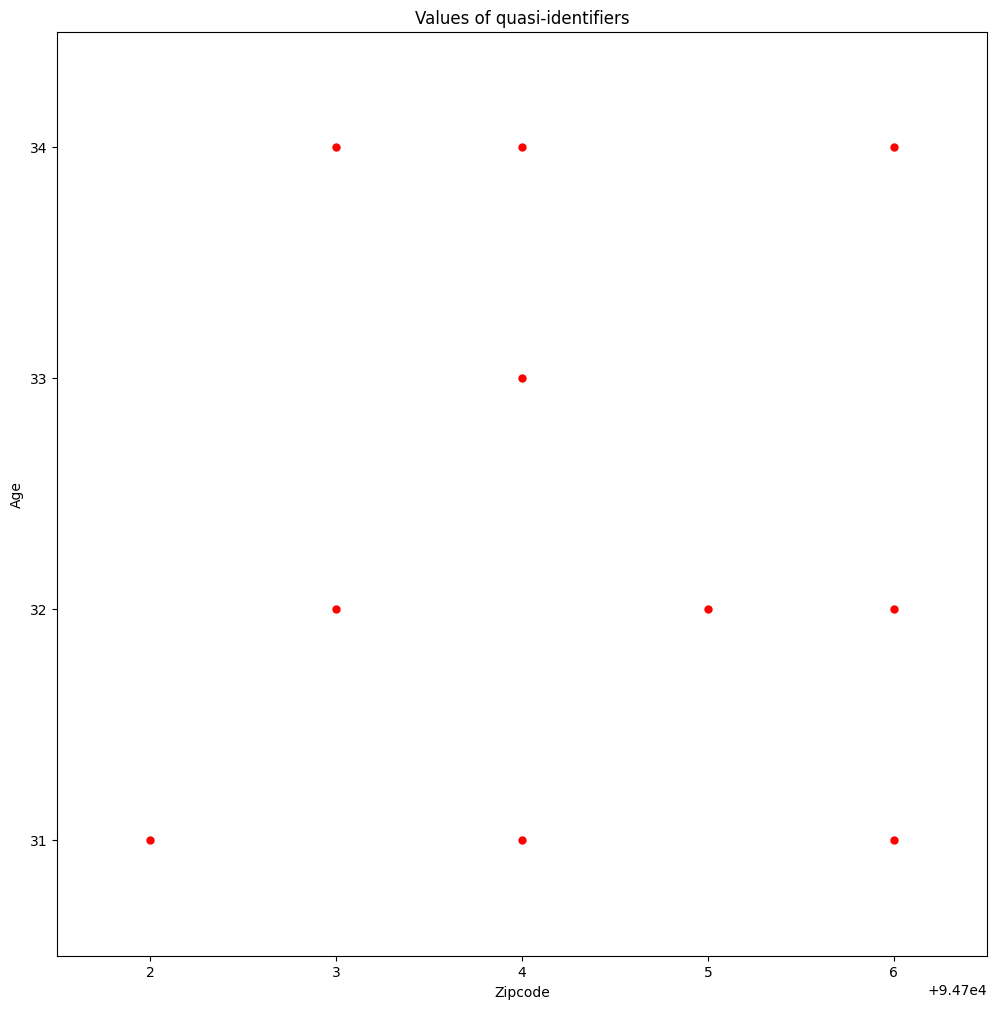

In [212]:
qID = ['Zipcode','Age']
visualize_data(Lab3_Problem1_demo, qID)

If we run the Mondrian algorithm on this data, with
- `dim_choice_fcn` to select a random dimension from the dimensions with allowable cuts (i.e., the function `Mondrian_choose_dim_random`), and
- `cut_choice_fcn` to select the median value from the values of the given dimension as the split value (i.e., the function `Mondrian_choose_cut_median`).

We should be able to manualy analyze the possible ways this algorithm can converge.

Using these (already implemented) functions, we run the following code to sanitize the data from `Lab3_Problem1_demo` as desired in the description above:

In [213]:
desired_k = 3
p1a_tableOut, p1a_boundaries = Mondrian(Lab3_Problem1_demo, qID, desired_k, Mondrian_choose_dim_random, Mondrian_choose_cut_median)

Let's take look at the output table

In [214]:
display(p1a_tableOut)

,Zipcode,Age
0,"(94702, 94706)","(31, 31)"
1,"(94702, 94706)","(31, 31)"
2,"(94702, 94706)","(31, 31)"
3,"(94703, 94706)","(32, 32)"
4,"(94703, 94706)","(32, 32)"
5,"(94703, 94706)","(32, 32)"
6,"(94703, 94706)","(33, 34)"
7,"(94703, 94706)","(33, 34)"
8,"(94703, 94706)","(33, 34)"
9,"(94703, 94706)","(33, 34)"


Note how each quasi-identifier now has a range of values instead of a single value. The new value indicates the range that the original value falls in.

Let's take a look at the different partitions (equivalence classes) returned by `Mondrian` and the corresponding value $k$ of that partition:

In [215]:
for partition_i in range(p1a_boundaries.shape[0]):
    display(Markdown(f'Partition number {partition_i+1}:'))
    display(p1a_boundaries.iloc[partition_i,:])

Partition number 1:

Zipcode    (94702, 94706)
Age              (31, 31)
k                       3
Name: 0, dtype: object

Partition number 2:

Zipcode    (94703, 94706)
Age              (32, 32)
k                       3
Name: 1, dtype: object

Partition number 3:

Zipcode    (94703, 94706)
Age              (33, 34)
k                       4
Name: 2, dtype: object

For each partition, the value of each quasi-identifier is formatted as `(minimum, maximum)` which are the smallest and largest values of the quasi-identifier within the partition, respectively.

Concisely, we can view all partitions at once:

In [216]:
display(p1a_boundaries)

,Zipcode,Age,k
0,"(94702, 94706)","(31, 31)",3
1,"(94703, 94706)","(32, 32)",3
2,"(94703, 94706)","(33, 34)",4


Let's verify that this output using our trusted code from Lab 2:

In [217]:
def kAnonymity_Analyze(data, qID):
    eqv_classes = data.groupby(qID).apply(lambda x: len(x), include_groups=False).reset_index(name='k')    
    return min(eqv_classes.k), eqv_classes

qID = ['Zipcode','Age']
[actual_k,ec_report] = kAnonymity_Analyze(p1a_tableOut, qID)
display(ec_report)
display(Markdown(f'Yielding k = {actual_k}'))

,Zipcode,Age,k
0,"(94702, 94706)","(31, 31)",3
1,"(94703, 94706)","(32, 32)",3
2,"(94703, 94706)","(33, 34)",4


Yielding k = 3

We see that the results match! Hooray!

However, it may be easier to visualize the generalized table as we've seen in the async and in discussion. For this purpose, you are provided another function in this lab, `visualize_Mondrian`, which visulizes the resulting partitions of the function `Mondrian` and superimposes them on the original data (for cases with $2$ quasi-identifiers only):

In [218]:
def visualize_Mondrian(table_in, quasi_identifiers, boundaries):
    """A function to visualize the outcome of the Mondrian algorithm
    
    Parameters
    ----------
    table_in : pandas.DataFrame
        The original table (not the output of Mondrian, but the original non-generalized table).
    quasi_identifiers : list
        A list containing the set of quasi-identifiers.
    boundaries : pandas.DataFrame
        The second output of the function Mondrian() containing the boundaries for each partition
    """
    
    assert len(quasi_identifiers) == 2, 'This function is meant to only be used for visualizing two dimensional partitions'
    # Start a figure
    fh, ax= pyplot.subplots(figsize=(12,12))
    
    
    # Calculate the min distances between datapoints in each dimension
    dim_granularities = numpy.full((table_in.shape[1],1), numpy.nan)
    for dim in range(2):
        dim_unique = numpy.unique(table_in.iloc[:,dim])
        dim_granularities[dim] = min(numpy.diff(dim_unique))/2
        

    # Generate the colors for the boundary boxes
    cols = pyplot.cm.gray(numpy.linspace(0,1,len(boundaries)), alpha=1)
    
    # For each boundary
    for boundary_i in range(0,len(boundaries)):
        # Get the current boundary dimensions
        curr_boundary = boundaries.loc[boundary_i,quasi_identifiers]
        
        # These are the x,y coordinates of the bottom left corner
        x = curr_boundary.iloc[0][0]-dim_granularities[0]
        y = curr_boundary.iloc[1][0]-dim_granularities[1]
        
        # These are the width and height of the box
        w = curr_boundary.iloc[0][1] - x + dim_granularities[0]
        h = curr_boundary.iloc[1][1] - y + dim_granularities[1]
        
        # Plot the box
        curr_ec = matplotlib.patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='red', facecolor=cols[boundary_i])
        
        ax.add_patch(curr_ec)
        
        pyplot.text(x+dim_granularities[0]*0.5, y+h/2+dim_granularities[1]*0, boundaries.loc[boundary_i,'k'] ,horizontalalignment='center', verticalalignment='center', size=10, c='red', bbox=dict(boxstyle='square,pad=0', facecolor='blue', alpha=0))
        
    visualize_data(table_in, quasi_identifiers, fh)
    pyplot.show()

    

We will use this function to visualize the output of `Mondrian` on our sample dataset:

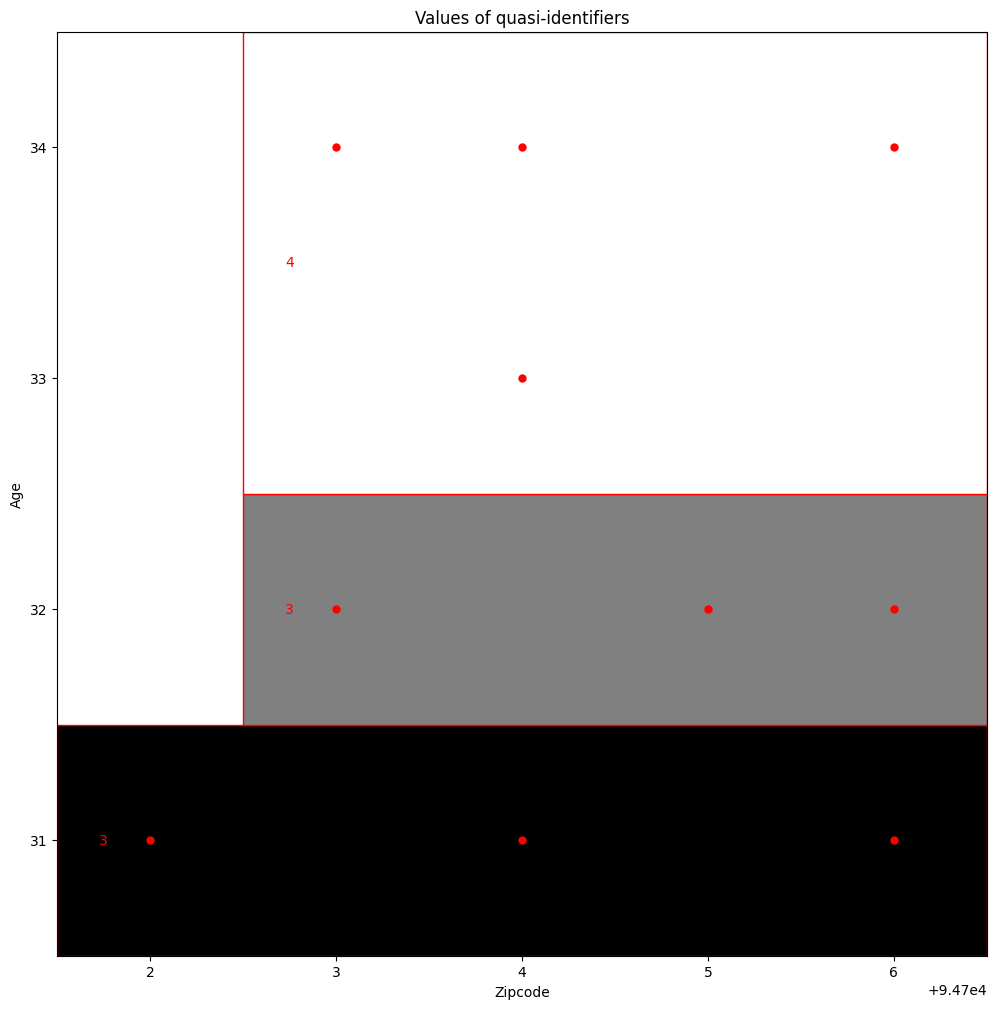

In [219]:
visualize_Mondrian(Lab3_Problem1_demo, qID, p1a_boundaries)

**Note** how the first argument to the function `visualize_Mondrian` is the original dataset (the input to `Mondrian`, not the output of `Mondrian`), this is because we would like to visualize the partitions on top of the original (non-generalized) dataset.

The function `visualize_Mondrian` plots bounding boxes around each partition, color them differently, and depict the number of data points in each partition inside the figure.

Since the choice of the next dimension to cut is random in this example, the algorhtm algorithm will potentially output a different partition every run.

Run the following snippet of code repeatedly to determine the number of different outputs this algorithm can generate, and store that value in the variable `p1a_nr_outputs`. You may hardcode the answer in your code.

Complete the following code snippet with your answer:

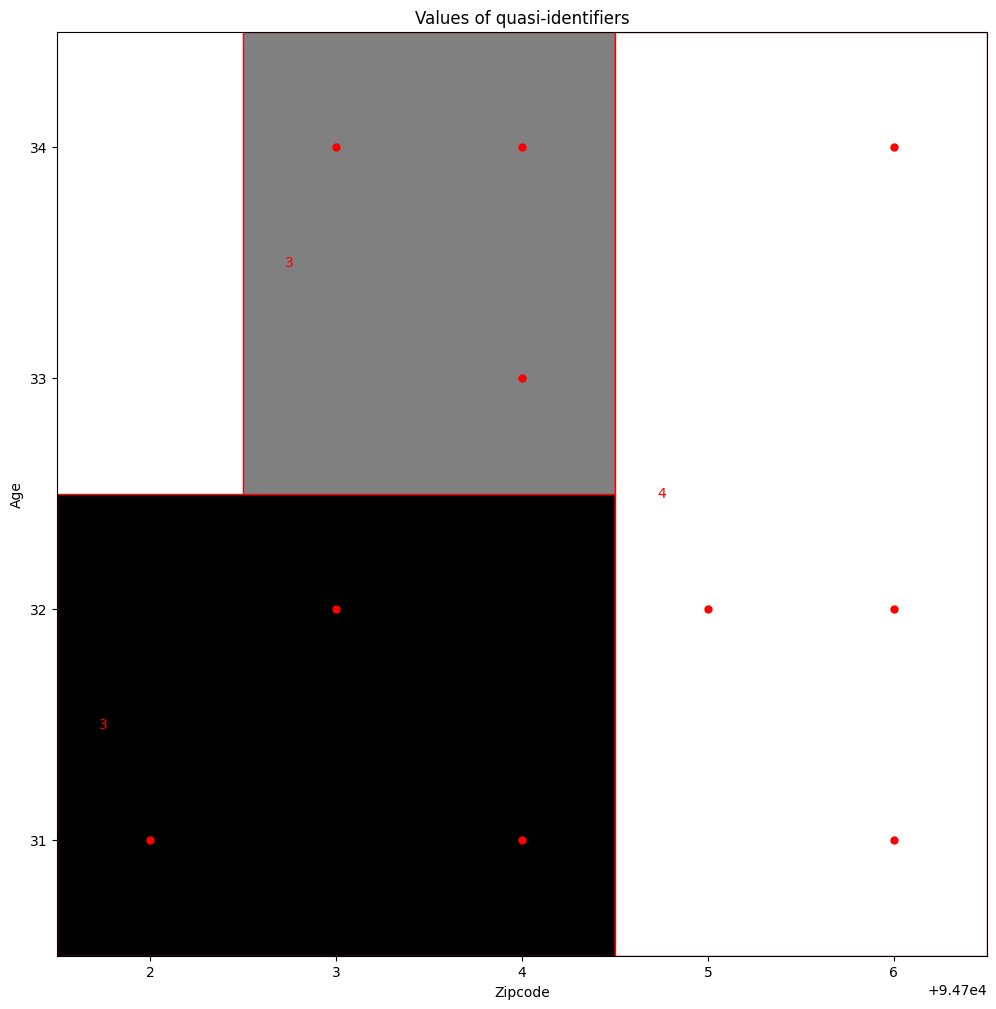

In [220]:
qID = ['Zipcode','Age']
desired_k = 3
[p1a_tableOut, p1a_boundaries] = Mondrian(Lab3_Problem1_demo, qID, desired_k, Mondrian_choose_dim_random, Mondrian_choose_cut_median)
visualize_Mondrian(Lab3_Problem1_demo, qID, p1a_boundaries)

# Fill in the answer in the following variable
p1a_nr_outputs = 4 # <-- your answer here

Run the following cell to print the outcomes of your code.

In [221]:
__problem = '1a'

try:
    print_mk(f'**Question**: How many possible outputs can `Mondrian` output for the sample dataset?<br>**Answer**: ${p1a_nr_outputs}$')
except Exception as e:
    safe_print_err(e)

**Question**: How many possible outputs can `Mondrian` output for the sample dataset?<br>**Answer**: $4$

---

## (b) More Data, Default Behavior

In this part, you will run the `Mondrian` algorithm on `Lab3_Data` on various sets of quasi-identifiers and $k$ values. All of the trials in this part should use the dimension choice function `Mondrian_choose_dim_random` and the cut value choice function `Mondrian_choose_cut_median`.

Concretely, run the function `Mondrian` on `Lab3_Data` five times, and assign the results in the following variables:
- `p1b_tableOut_ra_20` and `p1b_boundaries_ra_20`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Age']` and $k=20$.
    - `p1b_actual_k_ra_20`: Store the resulting $k$ value of the table after generalization.
- `p1b_tableOut_ra_40` and `p1b_boundaries_ra_40`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Age']` and $k=40$.
    - `p1b_actual_k_ra_40`: Store the resulting $k$ value of the table after generalization.
- `p1b_tableOut_ra_80` and `p1b_boundaries_ra_80`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Age']` and $k=80$.
    - `p1b_actual_k_ra_80`: Store the resulting $k$ value of the table after generalization.
- `p1b_tableOut_rm_20` and `p1b_boundaries_rm_20`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Marital_Status']` and $k=20$ .
    - `p1b_actual_k_rm_20`: Store the resulting $k$ value of the table after generalization.
- `p1b_tableOut_gm_40` and `p1b_boundaries_gm_40`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Gender', 'Marital_Status']`, and $k=40$.
    - `p1b_actual_k_gm_40`: Store the resulting $k$ value of the table after generalization.

Replace the following code snippet with your answer:

In [222]:
# Your solution goes here

[p1b_tableOut_ra_20, p1b_boundaries_ra_20] = Mondrian(Lab3_Data, ['Race', 'Age'], 20, Mondrian_choose_dim_random, Mondrian_choose_cut_median)
[k1, ec_report] = kAnonymity_Analyze(p1b_tableOut_ra_20, ['Race', 'Age'])
p1b_actual_k_ra_20 = k1

[p1b_tableOut_ra_40, p1b_boundaries_ra_40] = Mondrian(Lab3_Data, ['Race', 'Age'], 40, Mondrian_choose_dim_random, Mondrian_choose_cut_median)
[k2, ec_report] = kAnonymity_Analyze(p1b_tableOut_ra_40, ['Race', 'Age'])
p1b_actual_k_ra_40 = k2

[p1b_tableOut_ra_80, p1b_boundaries_ra_80] = Mondrian(Lab3_Data, ['Race', 'Age'], 80, Mondrian_choose_dim_random, Mondrian_choose_cut_median)
[k3, ec_report] = kAnonymity_Analyze(p1b_tableOut_ra_80, ['Race', 'Age'])
p1b_actual_k_ra_80 = k3

[p1b_tableOut_rm_20, p1b_boundaries_rm_20] = Mondrian(Lab3_Data, ['Race', 'Marital_Status'], 20, Mondrian_choose_dim_random, Mondrian_choose_cut_median)
[k4, ec_report] = kAnonymity_Analyze(p1b_tableOut_rm_20, ['Race', 'Marital_Status'])
p1b_actual_k_rm_20 = k4

[p1b_tableOut_gm_40, p1b_boundaries_gm_40] = Mondrian(Lab3_Data, ['Gender', 'Marital_Status'], 40, Mondrian_choose_dim_random, Mondrian_choose_cut_median)
[k5, ec_report] = kAnonymity_Analyze(p1b_tableOut_gm_40, ['Gender', 'Marital_Status'])
p1b_actual_k_gm_40 = k5

Run the following cell to present the outcomes of your code.

The results of the run for qID=['Race', 'Age'] with $k=20$ are:

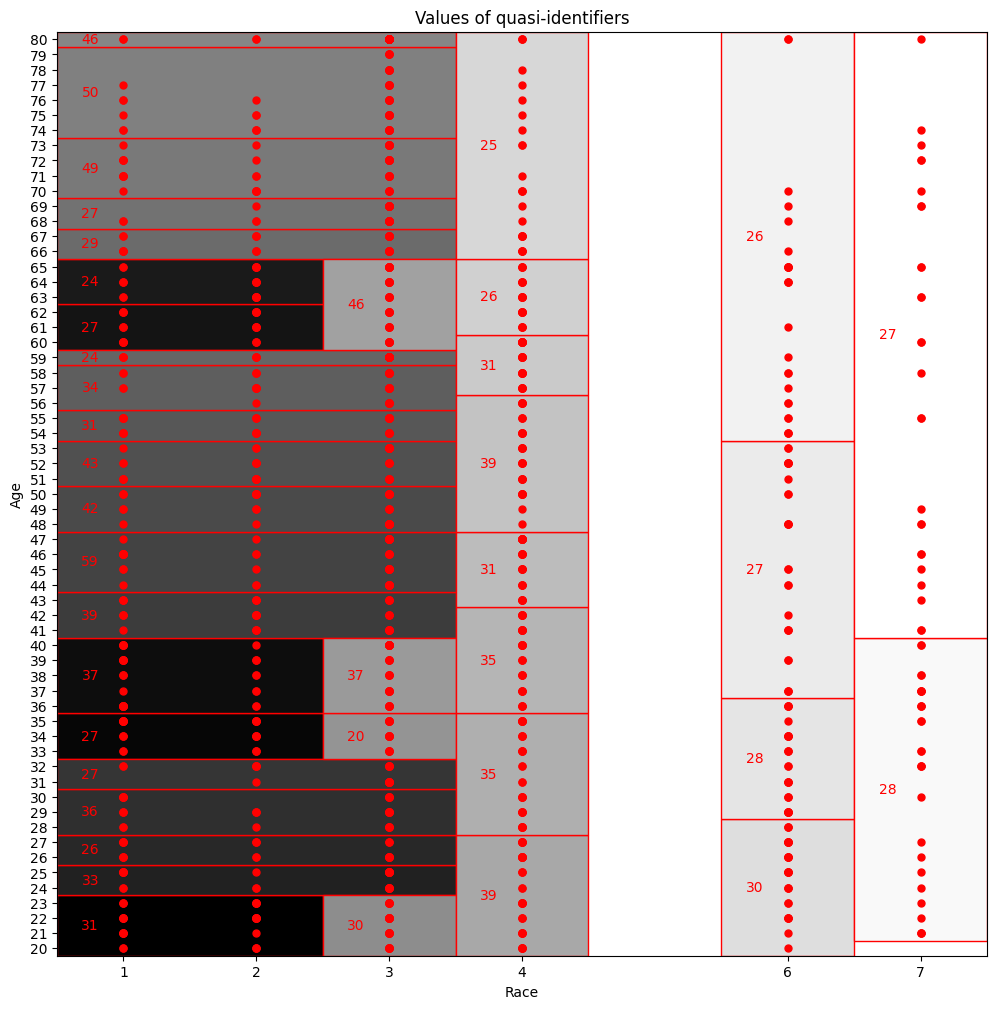

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83988,1,"(20, 23)",5,1,"(1, 2)",5,109,59,184,124.666667
1,84587,2,"(20, 23)",5,1,"(1, 2)",2,68,43,118,138.666667
2,84748,1,"(20, 23)",6,1,"(1, 2)",3,96,38,160,102.666667
3,84964,2,"(20, 23)",1,2,"(1, 2)",1,67,61,143,116.0
4,85042,1,"(20, 23)",6,2,"(1, 2)",10,98,61,181,141.333333
...,...,...,...,...,...,...,...,...,...,...,...
1296,90954,1,"(41, 80)",1,1,"(7, 7)",1,150,58,220,115.333333
1297,90971,2,"(41, 80)",1,1,"(7, 7)",2,111,96,221,128.0
1298,91292,1,"(41, 80)",5,1,"(7, 7)",2,74,54,140,126.0
1299,92494,2,"(41, 80)",1,1,"(7, 7)",1,149,47,228,128.0


The actual $k$ in the resulting generalization was $20$ (reference: requested $k$ was $20$).

<br><br>

The results of the run for qID=['Race', 'Age'] with $k=40$ are:

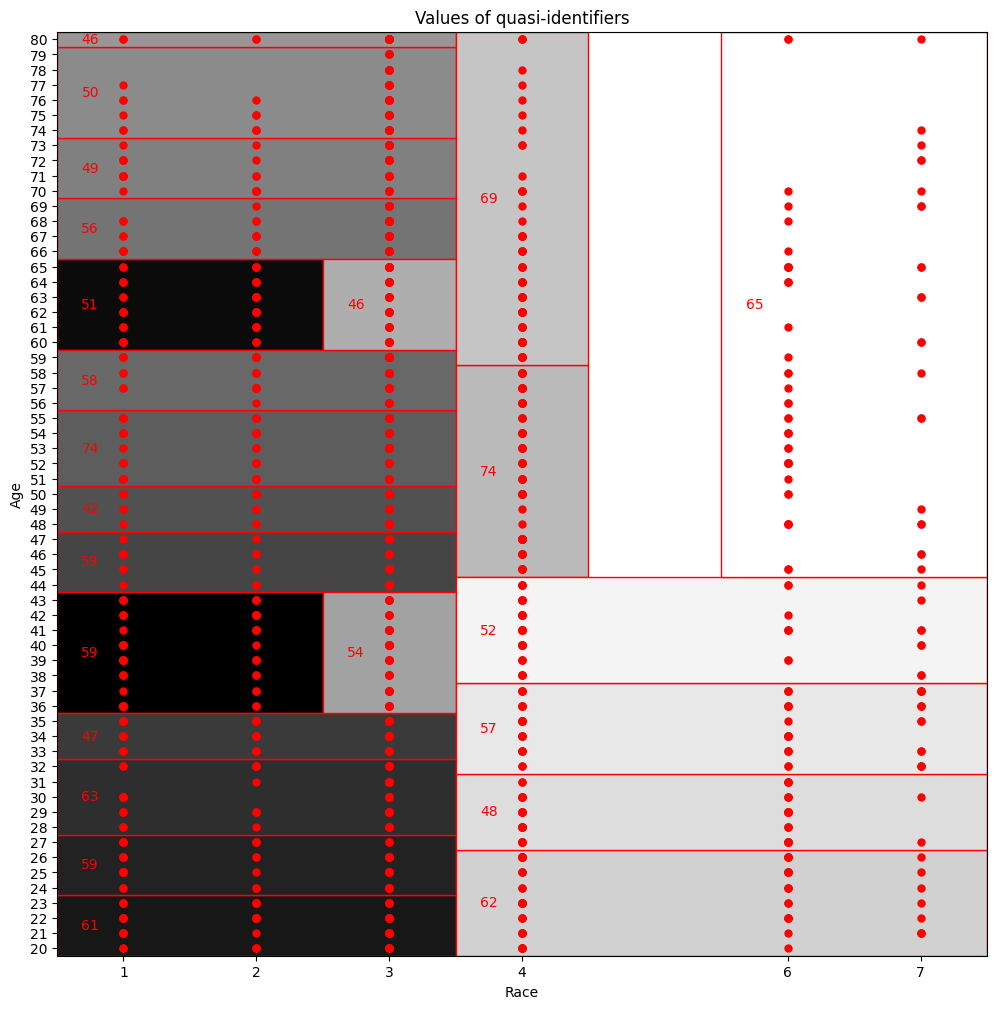

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83828,2,"(36, 43)",1,2,"(1, 2)",2,114,55,189,102.0
1,84073,2,"(36, 43)",5,1,"(1, 2)",2,78,40,147,116.0
2,84329,1,"(36, 43)",6,2,"(1, 2)",8,179,35,249,103.333333
3,84363,2,"(36, 43)",1,2,"(1, 2)",4,107,46,173,105.333333
4,84626,1,"(36, 43)",3,2,"(1, 2)",4,119,35,186,118.666667
...,...,...,...,...,...,...,...,...,...,...,...
1296,92849,2,"(45, 80)",1,2,"(6, 7)",1,93,26,157,147.333333
1297,92850,1,"(45, 80)",1,1,"(6, 7)",2,81,51,151,132.0
1298,92895,1,"(45, 80)",1,2,"(6, 7)",8,85,66,198,134.0
1299,93268,2,"(45, 80)",3,1,"(6, 7)",3,189,48,272,102.0


The actual $k$ in the resulting generalization was $42$ (reference: requested $k$ was $40$).

<br><br>

The results of the run for qID=['Race', 'Age'] with $k=80$ are:

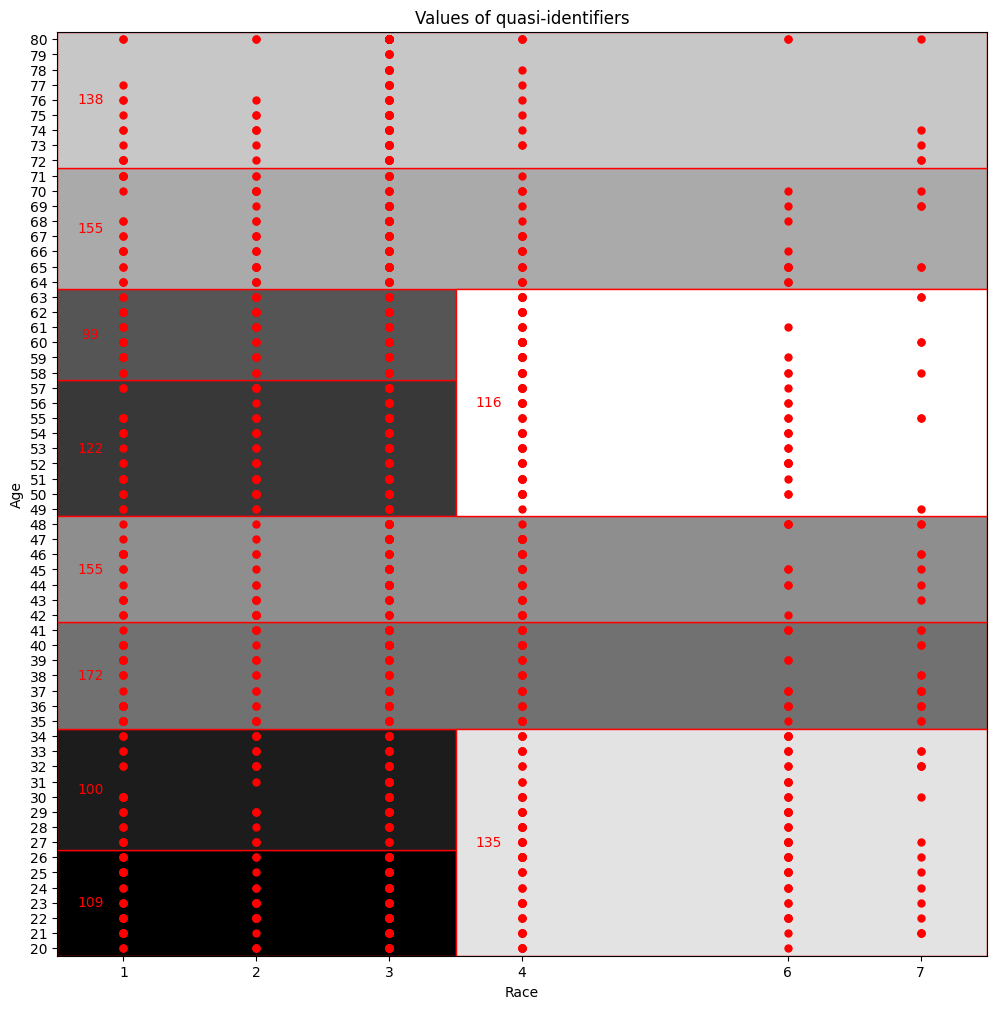

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83813,1,"(20, 26)",3,1,"(1, 3)",2,68,42,126,126.0
1,83988,1,"(20, 26)",5,1,"(1, 3)",5,109,59,184,124.666667
2,84058,2,"(20, 26)",5,1,"(1, 3)",3,91,75,174,116.666667
3,84130,2,"(20, 26)",1,1,"(1, 3)",2,110,97,227,126.666667
4,84142,1,"(20, 26)",5,1,"(1, 3)",3,128,40,195,130.666667
...,...,...,...,...,...,...,...,...,...,...,...
1296,93196,2,"(49, 63)",5,1,"(4, 7)",1,94,50,180,102.0
1297,93334,1,"(49, 63)",4,1,"(4, 7)",6,47,88,143,128.666667
1298,93374,2,"(49, 63)",1,2,"(4, 7)",1,142,81,235,118.0
1299,93386,2,"(49, 63)",3,1,"(4, 7)",2,108,63,178,136.0


The actual $k$ in the resulting generalization was $99$ (reference: requested $k$ was $80$).

<br><br>

The results of the run for qID=['Race', 'Marital_Status'] with $k=20$ are:

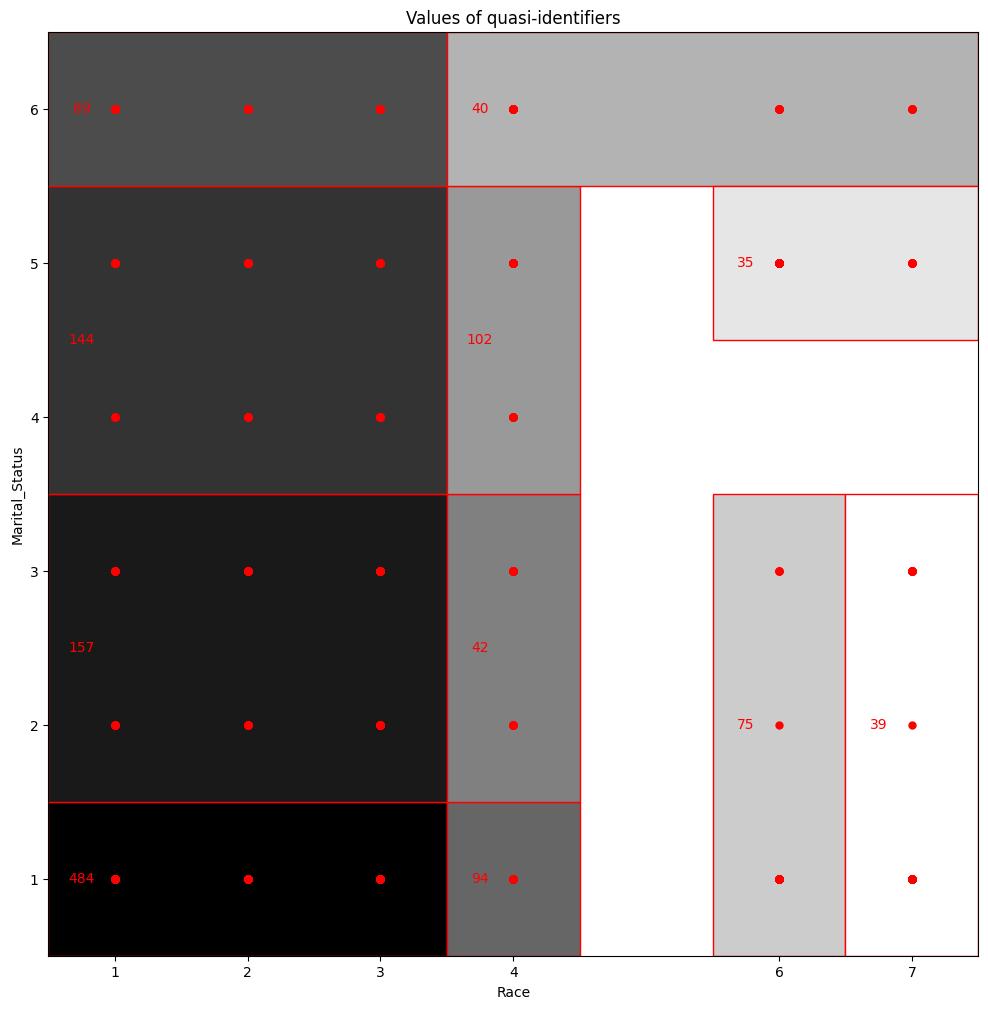

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83754,2,67,"(1, 1)",1,"(1, 3)",1,88,50,169,118.666667
1,83801,2,80,"(1, 1)",1,"(1, 3)",1,63,51,126,138.666667
2,83828,2,39,"(1, 1)",2,"(1, 3)",2,114,55,189,102.0
3,83851,2,37,"(1, 1)",1,"(1, 3)",1,145,39,197,123.333333
4,83854,2,46,"(1, 1)",1,"(1, 3)",1,120,48,185,123.333333
...,...,...,...,...,...,...,...,...,...,...,...
1296,91893,2,33,"(1, 3)",1,"(7, 7)",7,150,41,204,119.333333
1297,92486,1,40,"(1, 3)",1,"(7, 7)",2,194,33,281,124.666667
1298,92494,2,80,"(1, 3)",1,"(7, 7)",1,149,47,228,128.0
1299,92625,2,38,"(1, 3)",1,"(7, 7)",1,142,36,201,116.666667


The actual $k$ in the resulting generalization was $35$ (reference: requested $k$ was $20$).

<br><br>

The results of the run for qID=['Gender', 'Marital_Status'] with $k=40$ are:

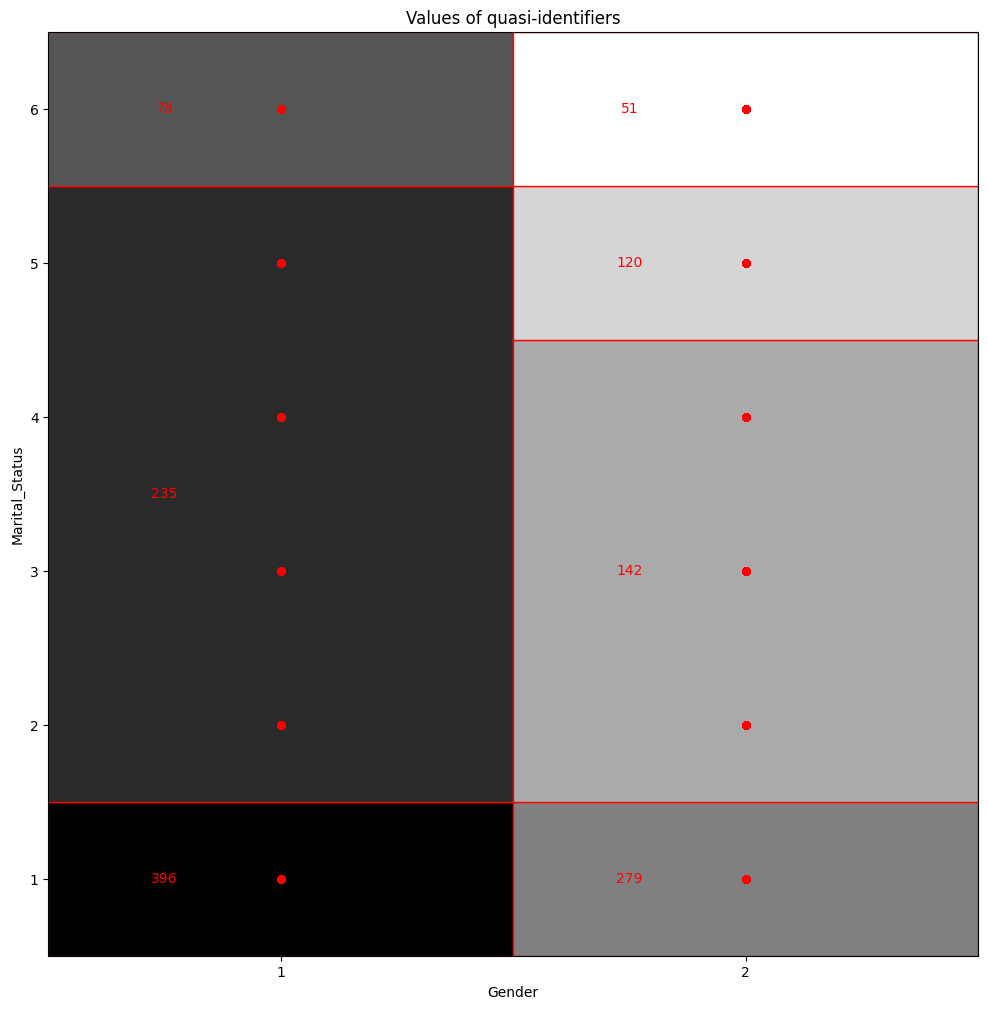

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83860,"(1, 1)",41,"(1, 1)",1,4,3,125,45,194,125.333333
1,83863,"(1, 1)",35,"(1, 1)",2,1,3,151,33,213,112.666667
2,83886,"(1, 1)",74,"(1, 1)",1,3,5,79,79,176,142.666667
3,83894,"(1, 1)",60,"(1, 1)",1,4,5,95,129,233,173.333333
4,83908,"(1, 1)",51,"(1, 1)",2,4,1,80,82,179,111.333333
...,...,...,...,...,...,...,...,...,...,...,...
1296,92358,"(2, 2)",21,"(6, 6)",1,3,1,114,38,173,116.0
1297,92914,"(2, 2)",65,"(6, 6)",1,3,1,109,48,175,128.666667
1298,93002,"(2, 2)",30,"(6, 6)",1,3,2,77,113,198,112.666667
1299,93206,"(2, 2)",44,"(6, 6)",2,2,2,121,71,202,127.333333


The actual $k$ in the resulting generalization was $51$ (reference: requested $k$ was $40$).

<br><br>

In [223]:
__problem = '1b'

try:
    to_print = [{'qID': ['Race', 'Age'], 'k': 20, 'tableOut': p1b_tableOut_ra_20, 'boundaries': p1b_boundaries_ra_20, 'actual_k': p1b_actual_k_ra_20}, \
                {'qID': ['Race', 'Age'], 'k': 40, 'tableOut': p1b_tableOut_ra_40, 'boundaries': p1b_boundaries_ra_40, 'actual_k': p1b_actual_k_ra_40}, \
                {'qID': ['Race', 'Age'], 'k': 80, 'tableOut': p1b_tableOut_ra_80, 'boundaries': p1b_boundaries_ra_80, 'actual_k': p1b_actual_k_ra_80}, \
                {'qID': ['Race', 'Marital_Status'], 'k': 20, 'tableOut': p1b_tableOut_rm_20, 'boundaries': p1b_boundaries_rm_20, 'actual_k': p1b_actual_k_rm_20}, \
                {'qID': ['Gender', 'Marital_Status'], 'k': 40, 'tableOut': p1b_tableOut_gm_40, 'boundaries': p1b_boundaries_gm_40, 'actual_k': p1b_actual_k_gm_40}]

    for next_to_print in to_print:
        next_qID = next_to_print["qID"]
        next_k = next_to_print["k"]
        next_tableOut = next_to_print["tableOut"]
        next_boundaries = next_to_print["boundaries"]
        next_actual_k = next_to_print["actual_k"]
        print_mk(f'The results of the run for qID={next_qID} with $k={next_k}$ are:')
        visualize_Mondrian(Lab3_Data, next_qID, next_boundaries)
        print_mk('The generalized table is:')
        display(next_tableOut)
        print_mk(f'The actual $k$ in the resulting generalization was ${next_actual_k}$ (reference: requested $k$ was ${next_k}$).')
        print_mk('<br><br>')

except Exception as e:
    safe_print_err(e)

### In this Markdown cell, answer the following question

- Are the actual levels of $k$-Anonymity of the table after generalization always **equal** to the desired/requested levels of $k$-Anonymity? Why is that the case?

***Place your answer here***

No, the actual levels of $k$-Anonymity are not always equal to the desired levels. We observe higher k-anonymity because the generalisation merges records into larger groups. This may be caused by too aggressive generalisation or by natural clustering in the data from many people sharing the same quasi-identifier values such as gender, marital status, or race.

---

## (c) Not Median This Time

In this part, we will implement the cut value choice mechanism `Mondrian_choose_cut_first_split`.

This mechanism is for `Mondrian` to select the split value for the cut (cf. line 9 in the algorithm), instead of being the median, this time based on the first value in the sorted order of values that permits both cuts to be of size at least $k$. If no such value exists, your function should return `numpy.nan`.

For example, if our dimension has the following values `[1, 2, 3, 3, 3, 3, 4, 5, 6, 6, 6, 6, 10, 10, 10]` with $k=5$, the function `Mondrian_choose_cut_first_split` should select $3$ as the cut value because it is the smallest value that will yield at least five values to its left (to be exact, there are values to its left in this example: `[1, 2, 3, 3, 3, 3,]`) and at least five values to its right (to be exact, there are nine values in this example: `[4, 5, 6, 6, 6, 6, 10, 10, 10]`).

Complete the implementation of the function `Mondrian_choose_cut_first_split` below.

In [224]:
def Mondrian_choose_cut_first_split(data,k):
    # Your solution here
    if len(data) < 2 * k:
        return numpy.nan

    sorted_data = sorted(data)
    unique_values = sorted(set(sorted_data))

    for value in unique_values:
        left_count = 0
        for num in sorted_data:
            if num <= value:
                left_count += 1
            else:
                break
        right_count = len(sorted_data) - left_count

        if left_count >= k and right_count >= k:
            return value

    return numpy.nan

Once you complete the implementation of `Mondrian_choose_cut_first_split`, use the following code for a sanity check. The only two possible outputs of the following code are listed in the following table. Confirm that the code is generating both of these outputs, and no other output.

| Possible Output #1 | Possible Output #2 |
| :-: | :-: |
| 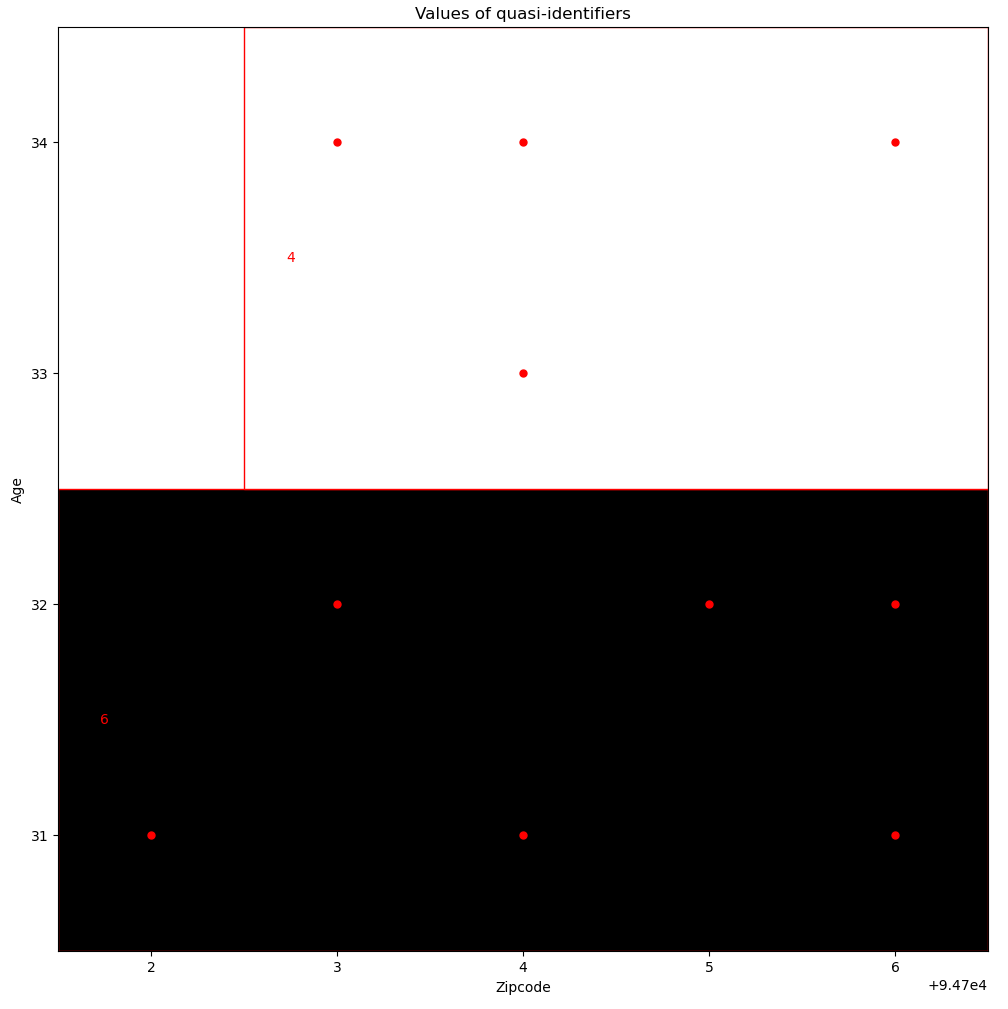 | 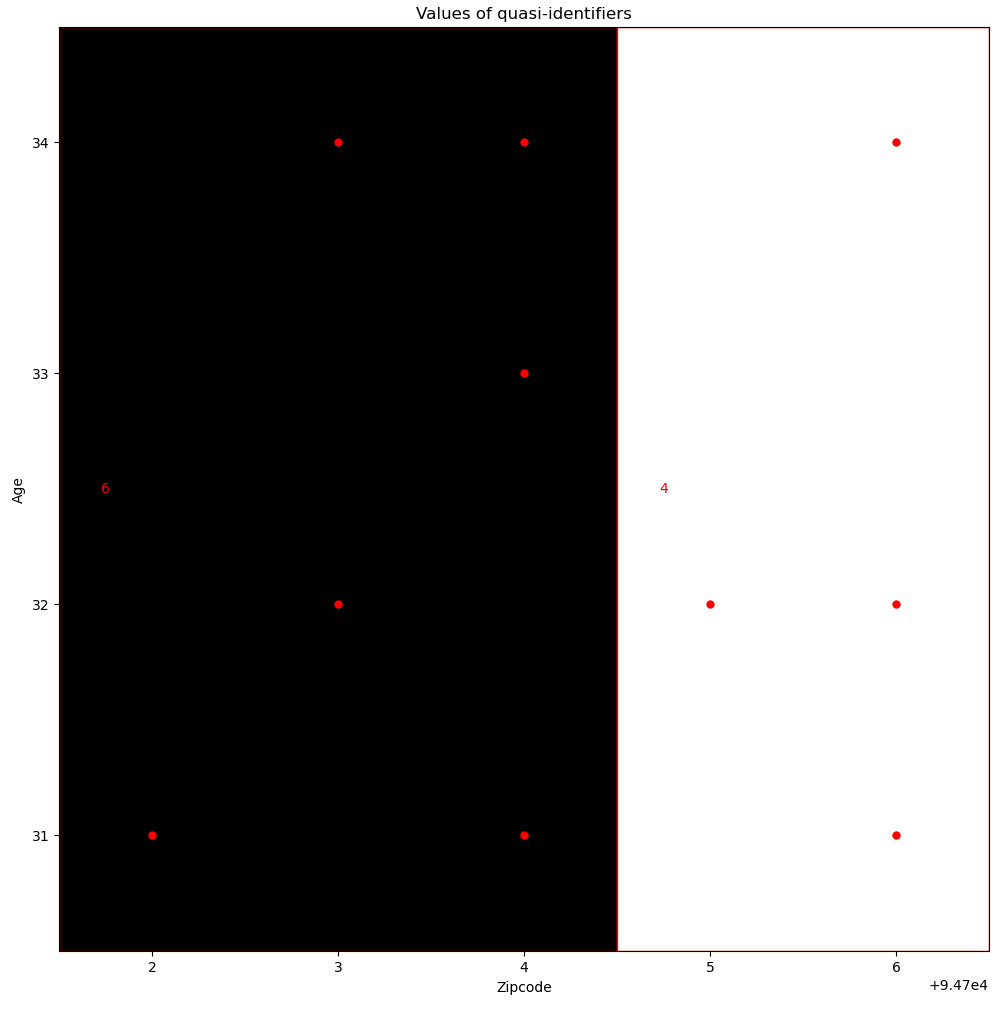 |

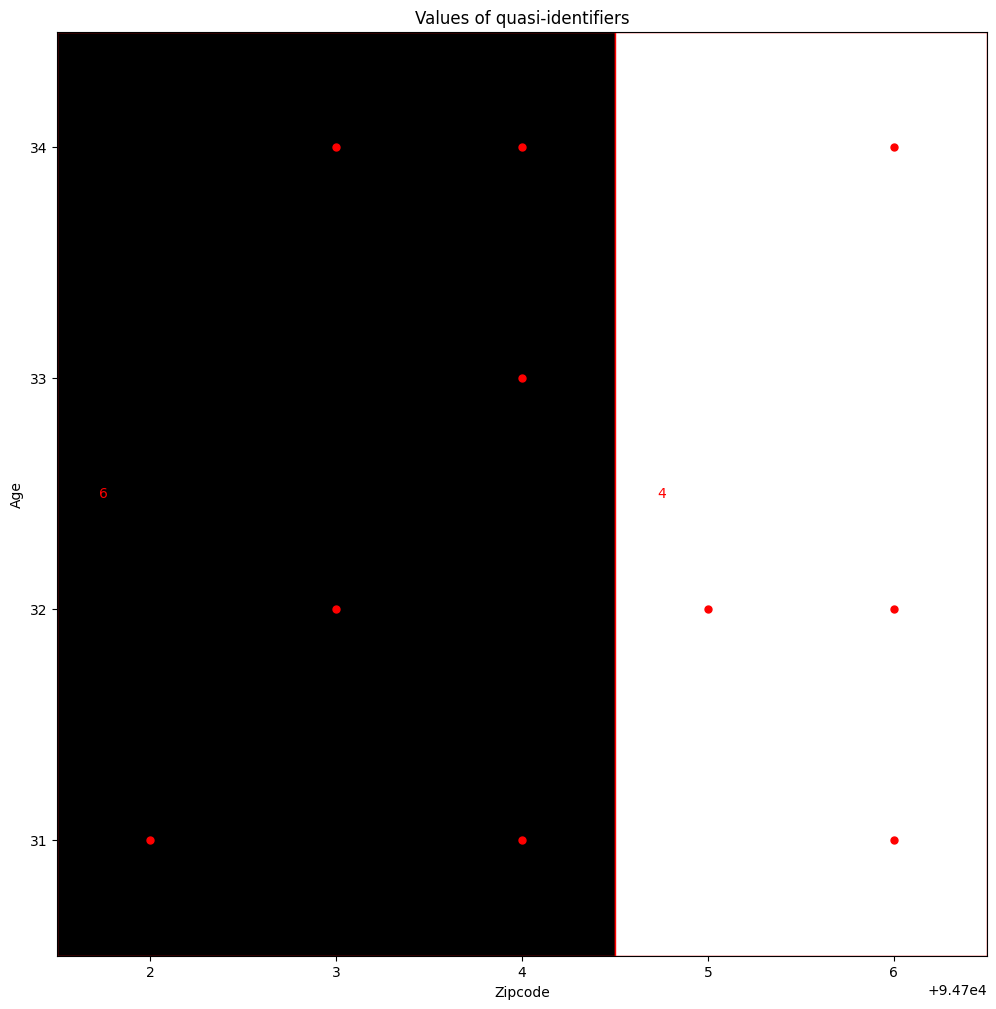

In [225]:
__problem = '1c'

try:
    qID = ['Zipcode','Age']
    desired_k = 4
    p1c_tableOut, p1c_boundaries = Mondrian(Lab3_Problem1_demo, qID,desired_k, Mondrian_choose_dim_random, Mondrian_choose_cut_first_split)
    visualize_Mondrian(Lab3_Problem1_demo, qID, p1c_boundaries)
    
except Exception as e:
    safe_print_err(e)

---

## (d) Not Median This Time - Continued

In this part, we will compare the behavior of `Mondrian` between using the `Mondrian_choose_cut_first_split` cut value choice mechanism, and the `Mondrian_choose_cut_median` cut value choice mechanism.

Concretely, run the function `Mondrian` on `Lab3_Data` twice, and assign the results in the following variables:
- `p1d_tableOut_cfs` and `p1d_boundaries_cfs`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Marital_Status']` and $k=60$ using the `Mondrian_choose_cut_first_split` cut value choice mechanism.
    - `p1d_actual_k_cfs`: Store the resulting $k$ value of the table after generalization.
- `p1d_tableOut_cm` and `p1d_boundaries_cm`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Marital_Status']` and $k=60$ using the `Mondrian_choose_cut_median` cut value choice mechanism.
    - `p1d_actual_k_cm`: Store the resulting $k$ value of the table after generalization.

In both cases, use the `Mondrian_choose_dim_random` dimension choice mechanism.

Complete the following code snippet with your code:

In [226]:
qID=['Race','Marital_Status']
desired_k=60

# Your solution here

[p1d_tableOut_cfs, p1d_boundaries_cfs] = Mondrian(Lab3_Data, qID, 60, Mondrian_choose_dim_random, Mondrian_choose_cut_first_split)
[k1, ec_report] = kAnonymity_Analyze(p1d_tableOut_cfs, qID)
p1d_actual_k_cfs = k1

[p1d_tableOut_cm, p1d_boundaries_cm] = Mondrian(Lab3_Data, qID, 60, Mondrian_choose_dim_random, Mondrian_choose_cut_median)
[k2, ec_report] = kAnonymity_Analyze(p1d_tableOut_cm, qID)
p1d_actual_k_cm = k2

Run the following cell to present the outcomes of your code.

The results of the run using `Mondrian_choose_cut_first_split` with qID=['Race', 'Marital_Status'] and $k=60$ are:

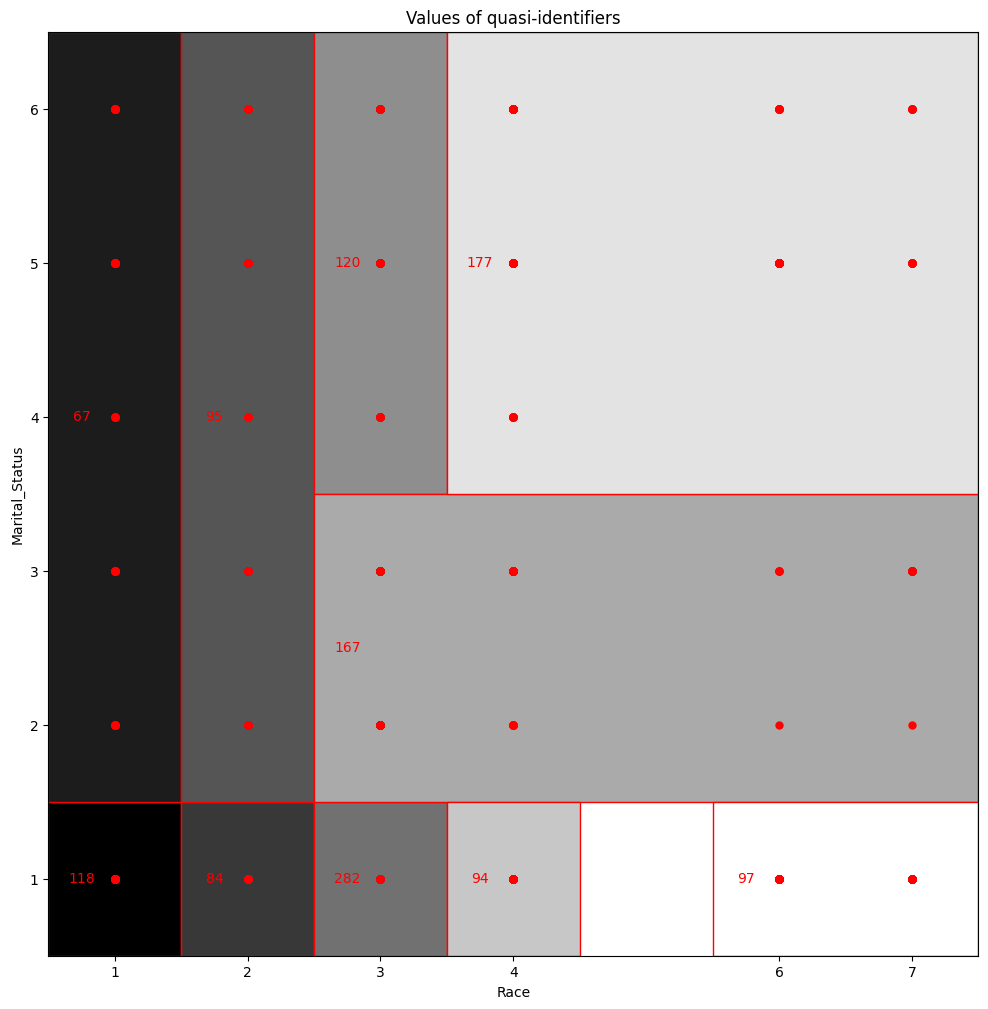

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83828,2,39,"(1, 1)",2,"(1, 1)",2,114,55,189,102.0
1,83854,2,46,"(1, 1)",1,"(1, 1)",1,120,48,185,123.333333
2,83863,1,35,"(1, 1)",2,"(1, 1)",3,151,33,213,112.666667
3,83987,1,68,"(1, 1)",2,"(1, 1)",10,78,38,151,152.0
4,84029,2,28,"(1, 1)",1,"(1, 1)",1,104,69,202,99.333333
...,...,...,...,...,...,...,...,...,...,...,...
1296,93330,2,30,"(1, 1)",2,"(6, 7)",1,141,65,215,102.666667
1297,93370,1,30,"(1, 1)",2,"(6, 7)",2,177,31,246,136.0
1298,93374,2,50,"(1, 1)",2,"(6, 7)",1,142,81,235,118.0
1299,93504,1,37,"(1, 1)",2,"(6, 7)",1,162,65,244,130.666667


The actual $k$ in the resulting generalization was $67$ (reference: requested $k$ was $60$).

<br><br>

The results of the run using `Mondrian_choose_cut_median` with qID=['Race', 'Marital_Status'] and $k=60$ are:

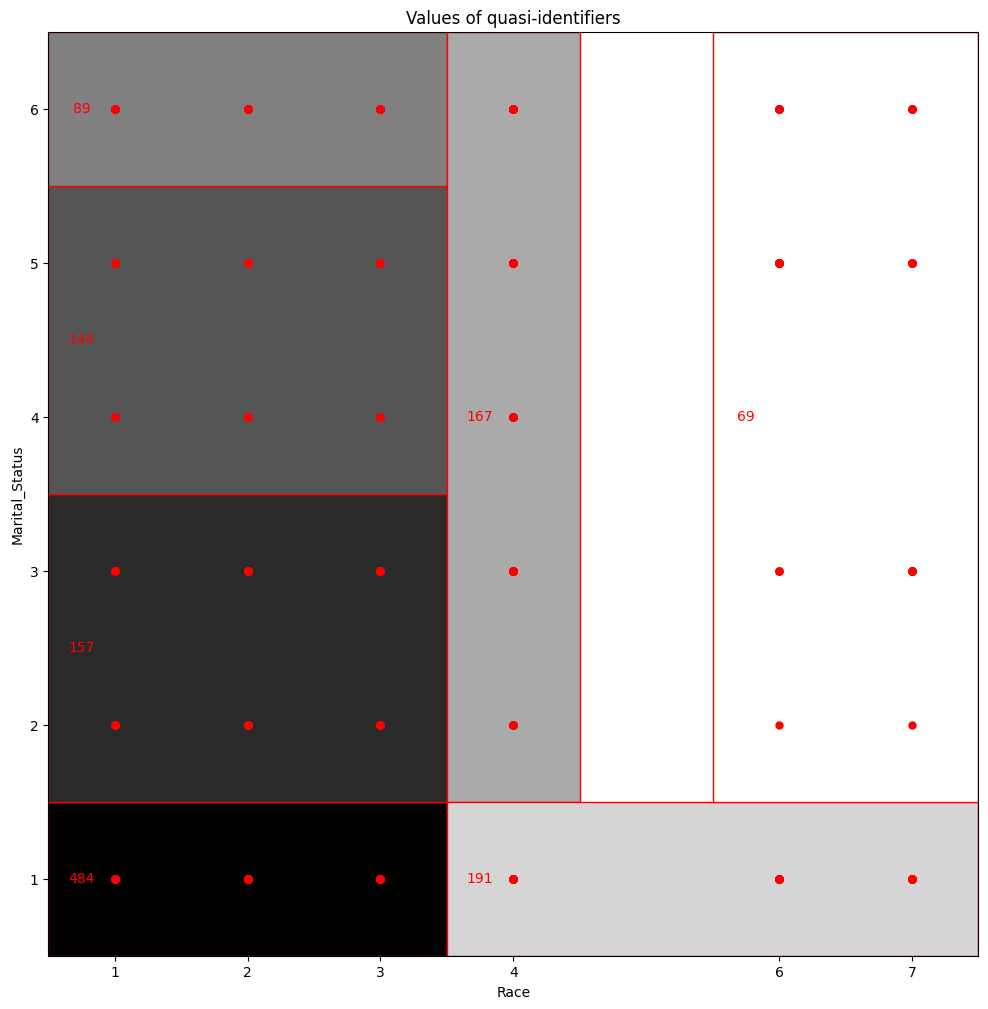

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83754,2,67,"(1, 1)",1,"(1, 3)",1,88,50,169,118.666667
1,83801,2,80,"(1, 1)",1,"(1, 3)",1,63,51,126,138.666667
2,83828,2,39,"(1, 1)",2,"(1, 3)",2,114,55,189,102.0
3,83851,2,37,"(1, 1)",1,"(1, 3)",1,145,39,197,123.333333
4,83854,2,46,"(1, 1)",1,"(1, 3)",1,120,48,185,123.333333
...,...,...,...,...,...,...,...,...,...,...,...
1296,92741,2,27,"(2, 6)",1,"(6, 7)",1,100,89,198,109.333333
1297,93092,1,28,"(2, 6)",1,"(6, 7)",1,138,50,223,132.0
1298,93268,2,73,"(2, 6)",1,"(6, 7)",3,189,48,272,102.0
1299,93373,1,44,"(2, 6)",2,"(6, 7)",1,95,46,190,124.0


The actual $k$ in the resulting generalization was $69$ (reference: requested $k$ was $60$).

<br><br>

In [227]:
__problem = '1d'

try:
    qID=['Race','Marital_Status']
    desired_k=60

    # Case 1
    print_mk(f'The results of the run using `Mondrian_choose_cut_first_split` with qID={qID} and $k={desired_k}$ are:')
    visualize_Mondrian(Lab3_Data, qID, p1d_boundaries_cfs)
    print_mk('The generalized table is:')
    display(p1d_tableOut_cfs)
    print_mk(f'The actual $k$ in the resulting generalization was ${p1d_actual_k_cfs}$ (reference: requested $k$ was ${desired_k}$).')
    print_mk('<br><br>')

    # Case 2
    print_mk(f'The results of the run using `Mondrian_choose_cut_median` with qID={qID} and $k={desired_k}$ are:')
    visualize_Mondrian(Lab3_Data, qID, p1d_boundaries_cm)
    print_mk('The generalized table is:')
    display(p1d_tableOut_cm)
    print_mk(f'The actual $k$ in the resulting generalization was ${p1d_actual_k_cm}$ (reference: requested $k$ was ${desired_k}$).')
    print_mk('<br><br>')

except Exception as e:
    safe_print_err(e)

---

## (e) More Than Random

In this part, we will implement the dimension choice mechanism `Mondrian_choose_dim_highest_distinct`.

This mechanism is for `Mondrian` to select the next dimension for a cut (cf. line 7 in the algorithm), instead of randomly, this time based on the dimension with the highest number of distinct values **out of the dimensions with allowable cuts**. Note that the function should return **the name** of the dimension as a string (i.e., not its index).

For example, if we have two dimensions **with allowable cuts**:
- `'Q1'` with values `[10, 10, 10, 10, 10, 20, 20, 20, 20, 20]`; and
- `'Q2'` with values `[1, 1, 2, 2, 3, 3, 3, 3, 3, 3]`

Then `Mondrian_choose_dim_highest_distinct` should select `'Q2'` since it has $3$ distinct values (as opposed to $2$ distinct values for `'Q1'`). In case of a tie between multiple dimensions, your function should output the dimension (out of the tying dimensions) that appears first from the list of dimensions `allowable_dims`.

Complete the implementation of the function `Mondrian_choose_dim_highest_distinct` below.

In [228]:
def Mondrian_choose_dim_highest_distinct(table_partition, allowable_dims):
    # Your solution here

    max_distinct = -1
    selected_dim = None

    for dim in allowable_dims:
        distinct_count = table_partition[dim].nunique()
        if distinct_count > max_distinct:
            max_distinct = distinct_count
            selected_dim = dim
        elif distinct_count == max_distinct:
            if allowable_dims.index(dim) < allowable_dims.index(selected_dim):
                selected_dim = dim

    return selected_dim

Once you complete the implementation of `Mondrian_choose_dim_highest_distinct`, use the following code for a sanity check. The only possible outputs of the following code is depicted below. Confirm that the code is generating this output, and no other output.

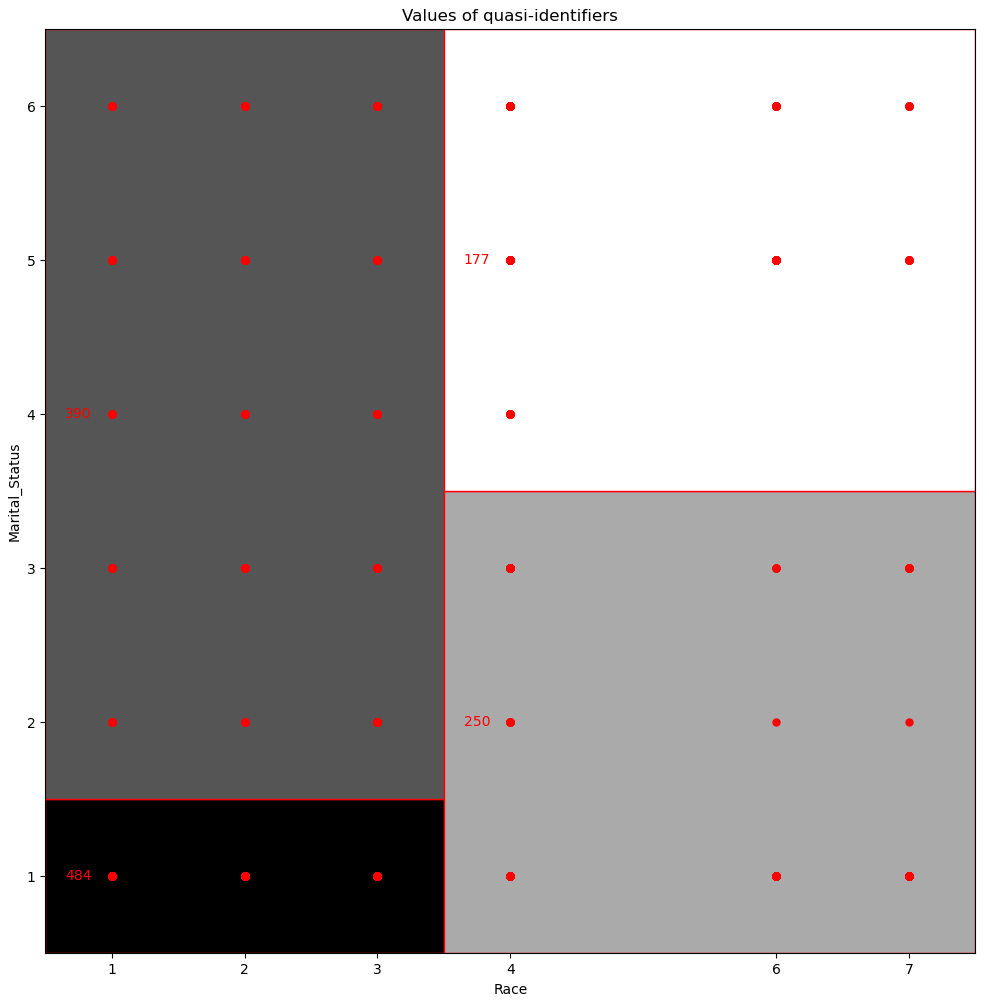

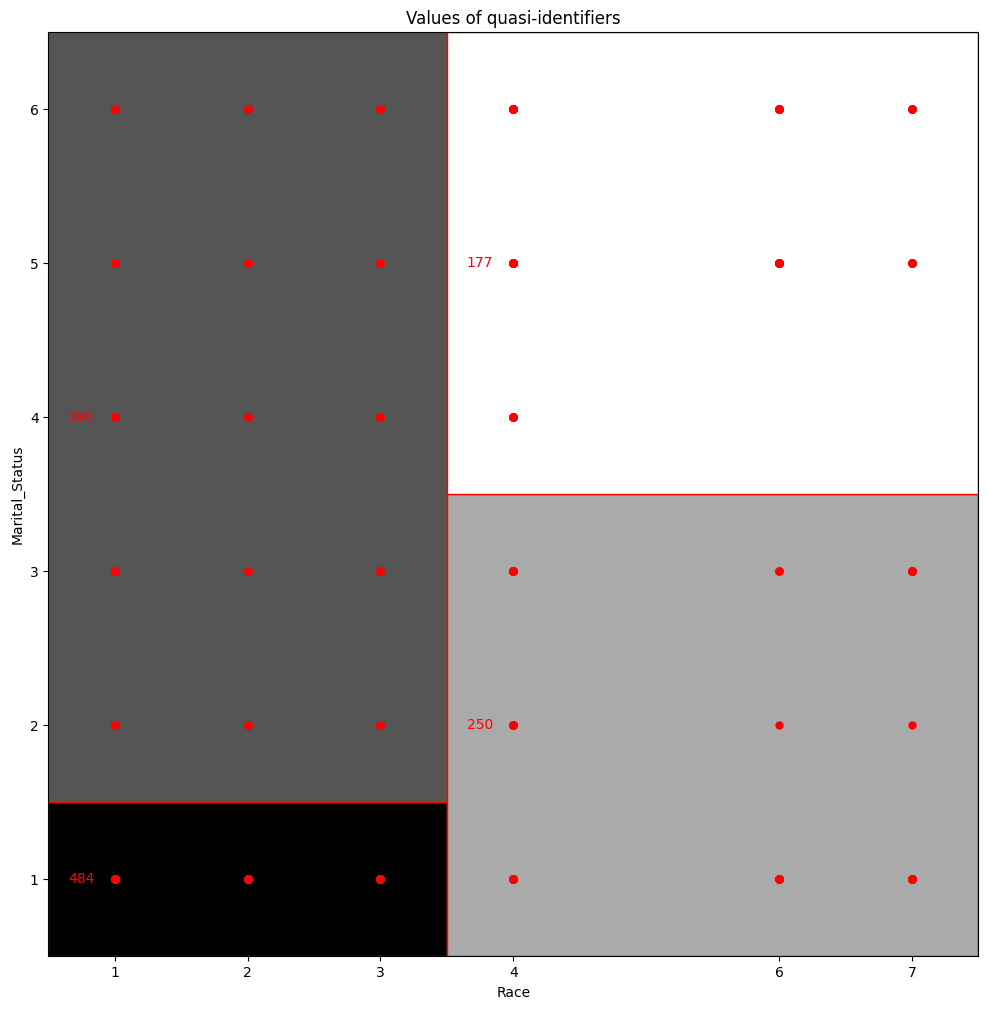

In [229]:
__problem = '1e'

try:
    qID = ['Race','Marital_Status']
    desired_k = 150
    p1e_tableOut, p1e_boundaries = Mondrian(Lab3_Data, qID,desired_k, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_median)
    visualize_Mondrian(Lab3_Data, qID, p1e_boundaries)

except Exception as e:
    safe_print_err(e)

---

## (f) More Than Random - Continued

In this part, we will investigate the behavior of `Mondrian` using the `Mondrian_choose_dim_highest_distinct` dimension choice mechanism.

Concretely, run the function `Mondrian` on `Lab3_Data` twice, and assign the results in the following variables:
- `p1f_tableOut_cfs` and `p1f_boundaries_cfs`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Marital_Status']` and $k=60$ using the `Mondrian_choose_cut_first_split` cut value choice mechanism.
    - `p1f_actual_k_cfs`: Store the resulting $k$ value of the table after generalization.
- `p1f_tableOut_cm` and `p1f_boundaries_cm`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Marital_Status']` and $k=60$ using the `Mondrian_choose_cut_median` cut value choice mechanism.
    - `p1f_actual_k_cm`: Store the resulting $k$ value of the table after generalization.

In both cases, use the `Mondrian_choose_dim_highest_distinct` dimension choice mechanism.

Complete the following code snippet with your code:

In [230]:
qID=['Race','Marital_Status']
desired_k=60

# Your solution here

[p1f_tableOut_cfs, p1f_boundaries_cfs] = Mondrian(Lab3_Data, qID, 60, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_first_split)
[k1, ec_report] = kAnonymity_Analyze(p1f_tableOut_cfs, qID)
p1f_actual_k_cfs = k1

[p1f_tableOut_cm, p1f_boundaries_cm] = Mondrian(Lab3_Data, qID, 60, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_median)
[k2, ec_report] = kAnonymity_Analyze(p1f_tableOut_cm, qID)
p1f_actual_k_cm = k2

Run the following cell to present the outcomes of your code.

The results of the run using `Mondrian_choose_cut_first_split` with qID=['Race', 'Marital_Status'] and $k=60$ are:

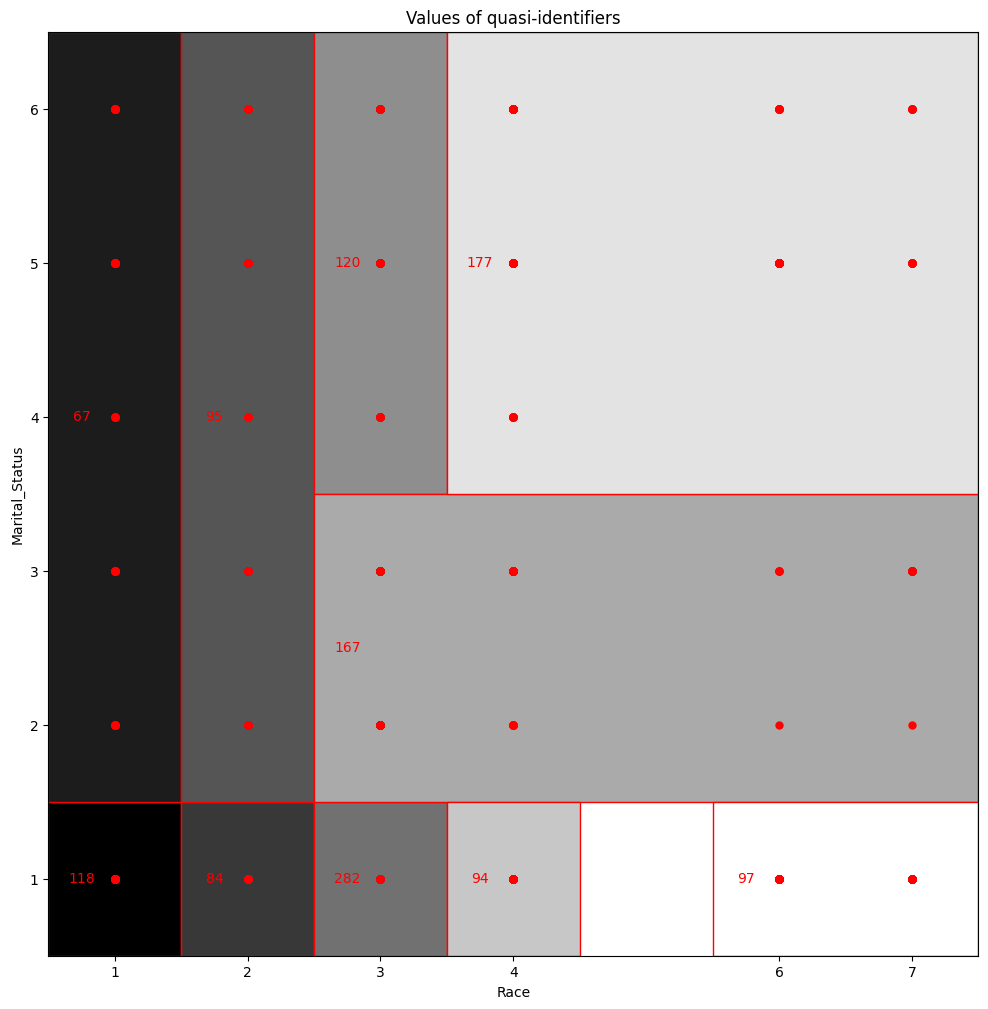

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83828,2,39,"(1, 1)",2,"(1, 1)",2,114,55,189,102.0
1,83854,2,46,"(1, 1)",1,"(1, 1)",1,120,48,185,123.333333
2,83863,1,35,"(1, 1)",2,"(1, 1)",3,151,33,213,112.666667
3,83987,1,68,"(1, 1)",2,"(1, 1)",10,78,38,151,152.0
4,84029,2,28,"(1, 1)",1,"(1, 1)",1,104,69,202,99.333333
...,...,...,...,...,...,...,...,...,...,...,...
1296,93330,2,30,"(1, 1)",2,"(6, 7)",1,141,65,215,102.666667
1297,93370,1,30,"(1, 1)",2,"(6, 7)",2,177,31,246,136.0
1298,93374,2,50,"(1, 1)",2,"(6, 7)",1,142,81,235,118.0
1299,93504,1,37,"(1, 1)",2,"(6, 7)",1,162,65,244,130.666667


The actual $k$ in the resulting generalization was $67$ (reference: requested $k$ was $60$).

<br><br>

The results of the run using `Mondrian_choose_cut_median` with qID=['Race', 'Marital_Status'] and $k=60$ are:

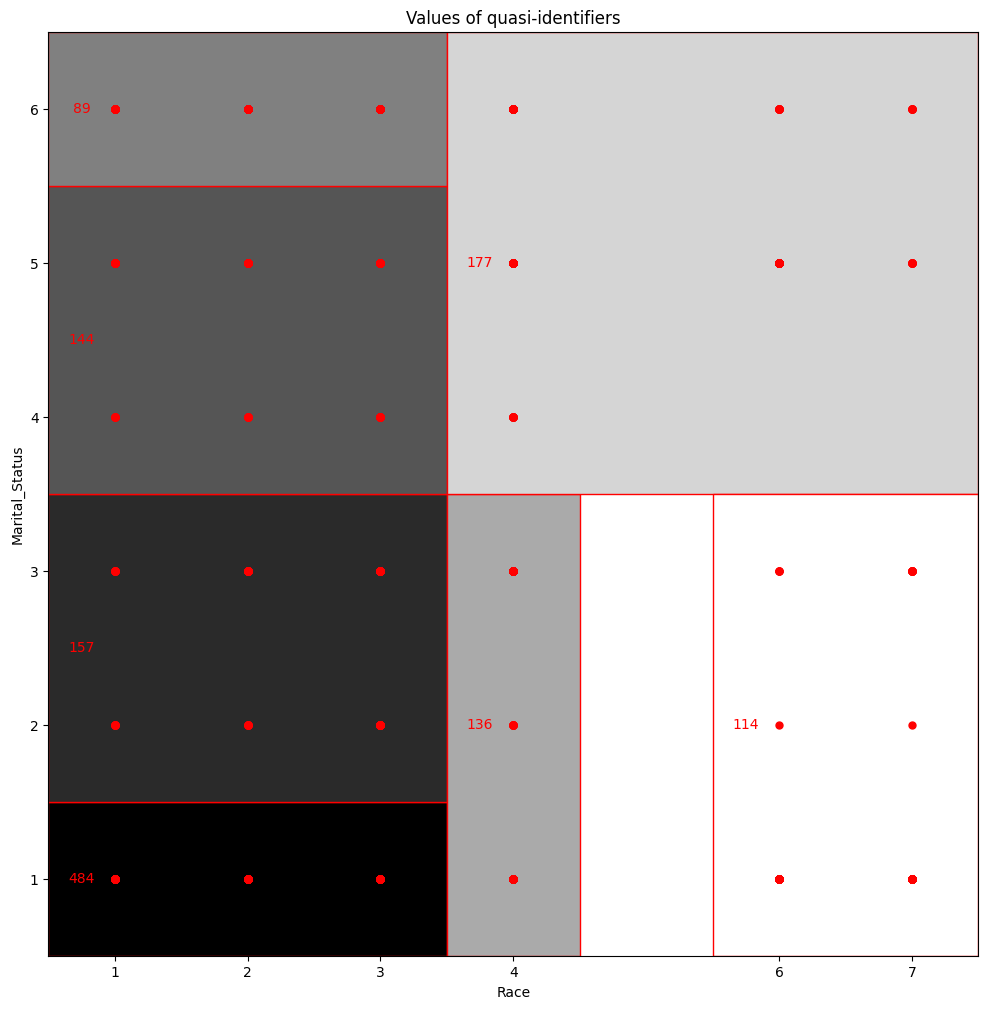

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83754,2,67,"(1, 1)",1,"(1, 3)",1,88,50,169,118.666667
1,83801,2,80,"(1, 1)",1,"(1, 3)",1,63,51,126,138.666667
2,83828,2,39,"(1, 1)",2,"(1, 3)",2,114,55,189,102.0
3,83851,2,37,"(1, 1)",1,"(1, 3)",1,145,39,197,123.333333
4,83854,2,46,"(1, 1)",1,"(1, 3)",1,120,48,185,123.333333
...,...,...,...,...,...,...,...,...,...,...,...
1296,93370,1,30,"(1, 3)",2,"(6, 7)",2,177,31,246,136.0
1297,93373,1,44,"(1, 3)",2,"(6, 7)",1,95,46,190,124.0
1298,93374,2,50,"(1, 3)",2,"(6, 7)",1,142,81,235,118.0
1299,93504,1,37,"(1, 3)",2,"(6, 7)",1,162,65,244,130.666667


The actual $k$ in the resulting generalization was $89$ (reference: requested $k$ was $60$).

<br><br>

In [231]:
__problem = '1f'

try:
    qID=['Race','Marital_Status']
    desired_k=60

    # Case 1
    print_mk(f'The results of the run using `Mondrian_choose_cut_first_split` with qID={qID} and $k={desired_k}$ are:')
    visualize_Mondrian(Lab3_Data, qID, p1f_boundaries_cfs)
    print_mk('The generalized table is:')
    display(p1f_tableOut_cfs)
    print_mk(f'The actual $k$ in the resulting generalization was ${p1f_actual_k_cfs}$ (reference: requested $k$ was ${desired_k}$).')
    print_mk('<br><br>')

    # Case 2
    print_mk(f'The results of the run using `Mondrian_choose_cut_median` with qID={qID} and $k={desired_k}$ are:')
    visualize_Mondrian(Lab3_Data, qID, p1f_boundaries_cm)
    print_mk('The generalized table is:')
    display(p1f_tableOut_cm)
    print_mk(f'The actual $k$ in the resulting generalization was ${p1f_actual_k_cm}$ (reference: requested $k$ was ${desired_k}$).')
    print_mk('<br><br>')

except Exception as e:
    safe_print_err(e)

---

## (g) One More Dimension Selection Mechanism

In this part, we will implement the dimension choice mechanism `Mondrian_choose_dim_highest_var`.

This mechanism is for `Mondrian` to select the next dimension for a cut (cf. line 7 in the algorithm), instead of randomly or based on the dimension with the highest number of distinct values, this time based on the dimension with the highest variance **out of the dimensions with allowable cuts**. Note that the function should return **the name** of the dimension as a string (i.e., not its index). In case of a tie between multiple dimensions, your function should output the dimension (out of the tying dimensions) that appears first from the list of dimensions `allowable_dims`.

For example, if we have two dimensions with allowable cuts:
- `'Q1'` with values `[10, 10, 10, 10, 10, 20, 20, 20, 20, 20]` (has variance $25$); and
- `'Q2'` with values `[1, 1, 2, 2, 3, 3, 3, 3, 3, 3]` (has variance $0.64$)

Then `Mondrian_choose_dim_highest_var` should select `'Q1'` since it has higher variance than `'Q2'`.

Complete the implementation of the function `Mondrian_choose_dim_highest_var` below.

In [232]:
def Mondrian_choose_dim_highest_var(table_partition, allowable_dims):
    # Your solution here

    max_variance = -1
    selected_dim = None

    for dim in allowable_dims:
        variance = table_partition[dim].var()
        if variance > max_variance:
            max_variance = variance
            selected_dim = dim
        elif variance == max_variance:
            if allowable_dims.index(dim) < allowable_dims.index(selected_dim):
                selected_dim = dim

    return selected_dim

Once you complete the implementation of `Mondrian_choose_dim_highest_var`, use the following code for a sanity check. The only possible outputs of the following code is depicted below. Confirm that the code is generating this output, and no other output.

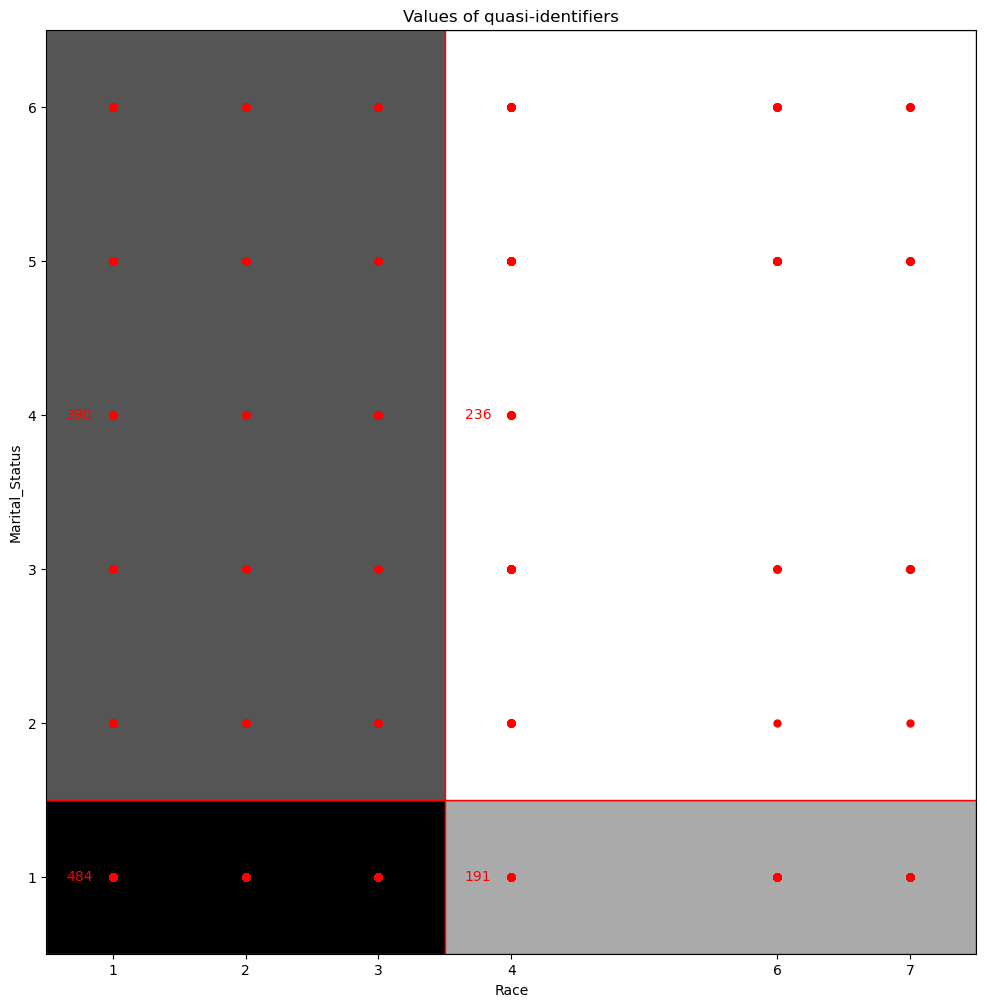

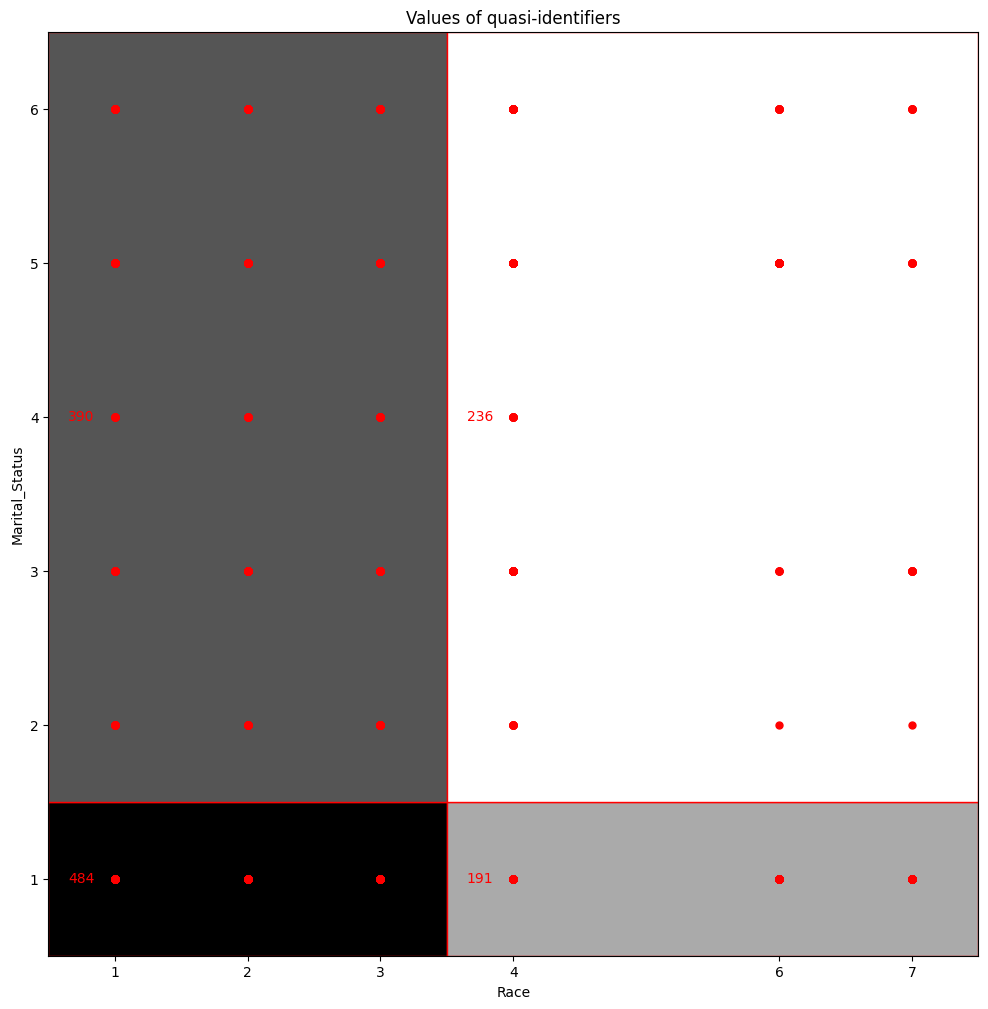

In [233]:
__problem = '1g'

try:
    qID = ['Race','Marital_Status']
    desired_k = 150
    [p1g_tableOut, p1g_boundaries] = Mondrian(Lab3_Data,qID,desired_k,Mondrian_choose_dim_highest_var, Mondrian_choose_cut_median)
    visualize_Mondrian(Lab3_Data, qID, p1g_boundaries)

except Exception as e:
    safe_print_err(e)

---

## (h) One More Dimension Selection Mechanism - Continued

In this part, we will investigate the behavior of `Mondrian` using the `Mondrian_choose_dim_highest_var` dimension choice mechanism.

Concretely, run the function `Mondrian` on `Lab3_Data` twice, and assign the results in the following variables:
- `p1h_tableOut_cfs` and `p1h_boundaries_cfs`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Marital_Status']` and $k=60$ using the `Mondrian_choose_cut_first_split` cut value choice mechanism.
    - `p1h_actual_k_cfs`: Store the resulting $k$ value of the table after generalization.
- `p1h_tableOut_cm` and `p1h_boundaries_cm`: For the results of `Mondrian` on `Lab3_Data` with `qID = ['Race', 'Marital_Status']` and $k=60$ using the `Mondrian_choose_cut_median` cut value choice mechanism.
    - `p1h_actual_k_cm`: Store the resulting $k$ value of the table after generalization.

In both cases, use the `Mondrian_choose_dim_highest_var` dimension choice mechanism.

Complete the following code snippet with your code:

In [234]:
qID=['Race','Marital_Status']
desired_k=60

# Your solution here

[p1h_tableOut_cfs, p1h_boundaries_cfs] = Mondrian(Lab3_Data, qID, 60, Mondrian_choose_dim_highest_var, Mondrian_choose_cut_first_split)
[k1, ec_report] = kAnonymity_Analyze(p1h_tableOut_cfs, qID)
p1h_actual_k_cfs = k1

[p1h_tableOut_cm, p1h_boundaries_cm] = Mondrian(Lab3_Data, qID, 60, Mondrian_choose_dim_highest_var, Mondrian_choose_cut_median)
[k2, ec_report] = kAnonymity_Analyze(p1h_tableOut_cm, qID)
p1h_actual_k_cm = k2

Run the following cell to present the outcomes of your code.

The results of the run using `Mondrian_choose_cut_first_split` with qID=['Race', 'Marital_Status'] and $k=60$ are:

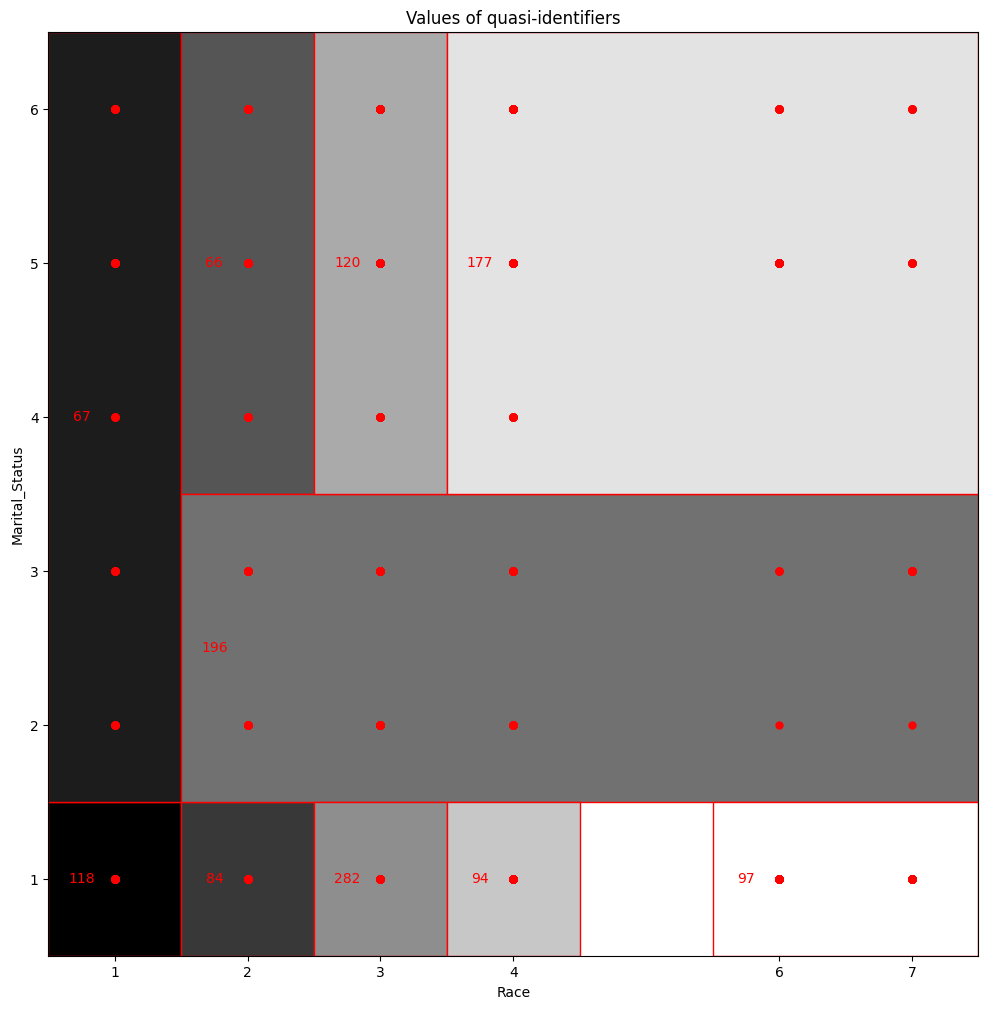

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83828,2,39,"(1, 1)",2,"(1, 1)",2,114,55,189,102.0
1,83854,2,46,"(1, 1)",1,"(1, 1)",1,120,48,185,123.333333
2,83863,1,35,"(1, 1)",2,"(1, 1)",3,151,33,213,112.666667
3,83987,1,68,"(1, 1)",2,"(1, 1)",10,78,38,151,152.0
4,84029,2,28,"(1, 1)",1,"(1, 1)",1,104,69,202,99.333333
...,...,...,...,...,...,...,...,...,...,...,...
1296,93330,2,30,"(1, 1)",2,"(6, 7)",1,141,65,215,102.666667
1297,93370,1,30,"(1, 1)",2,"(6, 7)",2,177,31,246,136.0
1298,93374,2,50,"(1, 1)",2,"(6, 7)",1,142,81,235,118.0
1299,93504,1,37,"(1, 1)",2,"(6, 7)",1,162,65,244,130.666667


The actual $k$ in the resulting generalization was $66$ (reference: requested $k$ was $60$).

<br><br>

The results of the run using `Mondrian_choose_cut_median` with qID=['Race', 'Marital_Status'] and $k=60$ are:

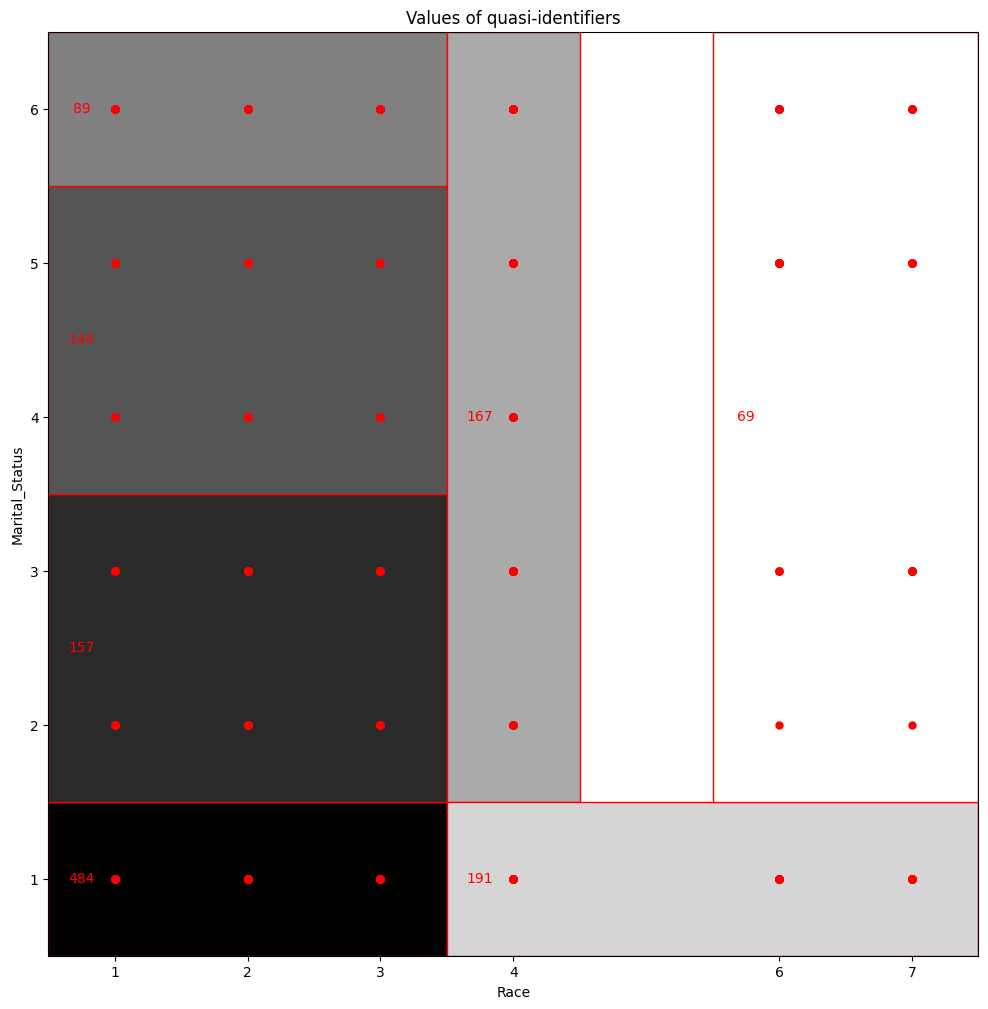

The generalized table is:

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Alcohol_Average,LDL_Cholesterol,HDL_Cholesterol,Total_Cholesterol,Sys_Blood_Pressure
0,83754,2,67,"(1, 1)",1,"(1, 3)",1,88,50,169,118.666667
1,83801,2,80,"(1, 1)",1,"(1, 3)",1,63,51,126,138.666667
2,83828,2,39,"(1, 1)",2,"(1, 3)",2,114,55,189,102.0
3,83851,2,37,"(1, 1)",1,"(1, 3)",1,145,39,197,123.333333
4,83854,2,46,"(1, 1)",1,"(1, 3)",1,120,48,185,123.333333
...,...,...,...,...,...,...,...,...,...,...,...
1296,92741,2,27,"(2, 6)",1,"(6, 7)",1,100,89,198,109.333333
1297,93092,1,28,"(2, 6)",1,"(6, 7)",1,138,50,223,132.0
1298,93268,2,73,"(2, 6)",1,"(6, 7)",3,189,48,272,102.0
1299,93373,1,44,"(2, 6)",2,"(6, 7)",1,95,46,190,124.0


The actual $k$ in the resulting generalization was $69$ (reference: requested $k$ was $60$).

<br><br>

In [235]:
__problem = '1h'

try:
    qID=['Race','Marital_Status']
    desired_k=60

    # Case 1
    print_mk(f'The results of the run using `Mondrian_choose_cut_first_split` with qID={qID} and $k={desired_k}$ are:')
    visualize_Mondrian(Lab3_Data, qID, p1h_boundaries_cfs)
    print_mk('The generalized table is:')
    display(p1h_tableOut_cfs)
    print_mk(f'The actual $k$ in the resulting generalization was ${p1h_actual_k_cfs}$ (reference: requested $k$ was ${desired_k}$).')
    print_mk('<br><br>')

    # Case 2
    print_mk(f'The results of the run using `Mondrian_choose_cut_median` with qID={qID} and $k={desired_k}$ are:')
    visualize_Mondrian(Lab3_Data, qID, p1h_boundaries_cm)
    print_mk('The generalized table is:')
    display(p1h_tableOut_cm)
    print_mk(f'The actual $k$ in the resulting generalization was ${p1h_actual_k_cm}$ (reference: requested $k$ was ${desired_k}$).')
    print_mk('<br><br>')

except Exception as e:
    safe_print_err(e)

---

## (i) More Than Two Dimensions

In this part, we will sanitize the data in `Lab3_Data`, according to quasi identifiers
```python
qID = ['Gender','Age','Marital_Status','Country_Birth','Race']
```

We will not be able to visualize the resulting generalization for this part, given that there are more than $2$ dimensions in the set of quasi-identifiers. Therefore, we will analyze the privacy-utility tradeoff.

Write code that sanitizes `Lab3_Data`, with respect to quasi-identifiers `qID` to achieve k-Anonymity with the various values of $k=50,55,60,65,\dots,200$ (from $50$ to $200$ in increments of $5$; this is given to you in the variable `p1i_desired_ks`). Use the dimension choice mechanism `Mondrian_choose_dim_highest_distinct` and the cut value choice mechanism `Mondrian_choose_cut_first_split`.

For each value from the list of desired $k$ values, record the actual $k$ achieved and the Discernability Cost of the sanitization, and store them in the following variables:
- `p1i_actual_k_values`: The list of achieved $k$ values, in the same order as the values in the variable `p1i_desired_ks`.
- `p1i_discernability_costs`: The list of values of Discernability Cost of the output generalizations, in the same order as the values in the variable  `p1i_desired_ks`.

Complete the following code snippet with your code:

In [236]:
qID = ['Gender','Age','Marital_Status','Country_Birth','Race']
p1i_desired_ks = range(50,201,5)

# Your solution here

p1i_actual_k_values = []
p1i_discernability_costs = []

for k in p1i_desired_ks:
    table_out, partition_boundaries = Mondrian(Lab3_Data, qID, k, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_first_split)
    actual_k = partition_boundaries['k'].min()
    p1i_actual_k_values.append(actual_k)
    discernability_cost = (partition_boundaries['k'] ** 2).sum()
    p1i_discernability_costs.append(discernability_cost)

Run the following cell to plot the outcomes of your code. The provided code will generate the following $3$ plots:
- A plot of the discernability cost (on the y-axis) vs the desired k (on the x-axis).
- A plot of the actual k achieved (on a second y-axis; using yyaxis right) vs the desired k (on the x-axis).
- A plot of the line x=y by plotting the desired k (on the second y-axis) vs the desired k (on the x-axis).

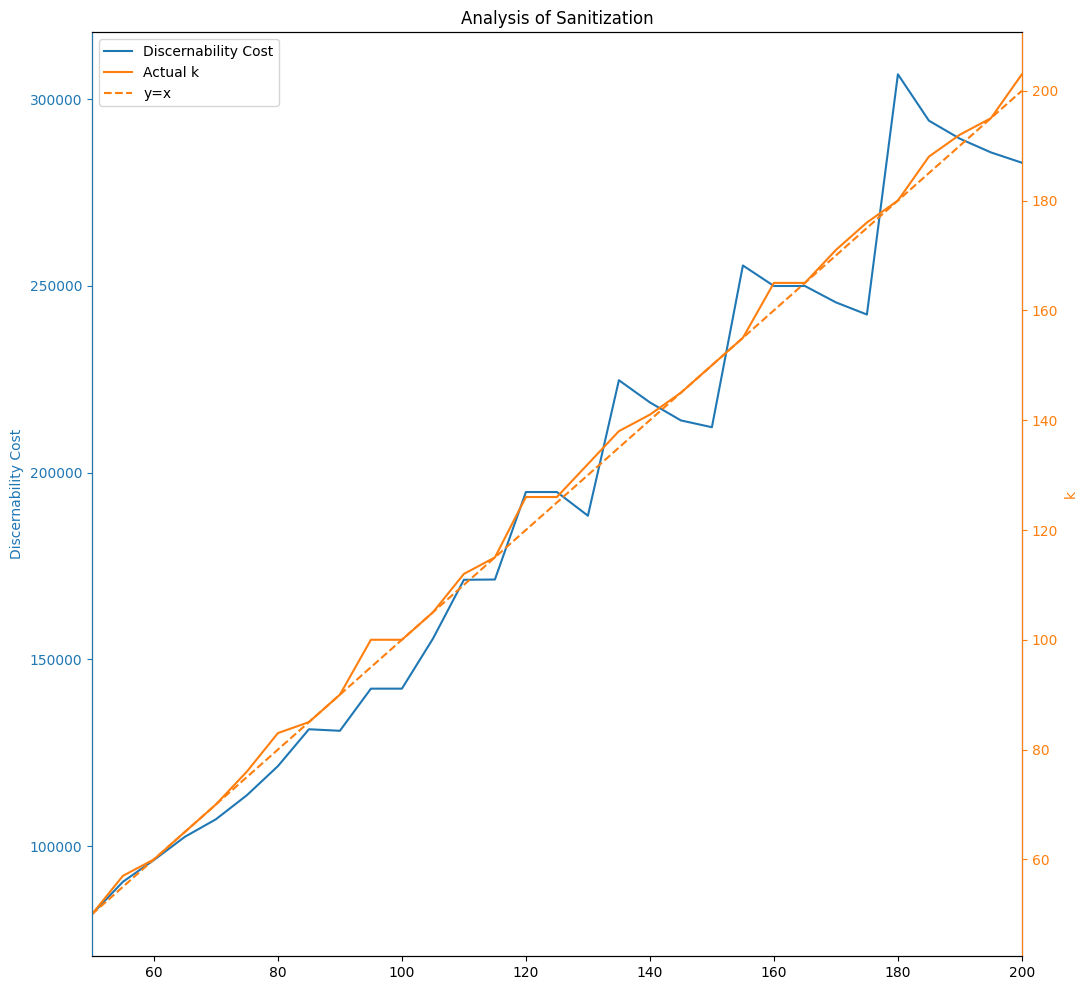

In [237]:
__problem = '1i'

try:
    qID = ['Gender','Age','Marital_Status','Country_Birth','Race']
    p1i_desired_ks = range(50,201,5)
    pyplot.figure(figsize=(12,12))
    ax1 = pyplot.gca()
    plt1=pyplot.plot(p1i_desired_ks, p1i_discernability_costs, color='C0')
    pyplot.ylabel('Discernability Cost', color='C0')
    pyplot.tick_params(axis='y', color='C0', labelcolor='C0')
    ax2 = ax1.twinx()
    plt2=pyplot.plot(p1i_desired_ks, p1i_actual_k_values, color='C1')
    # For refeerence
    plt3=pyplot.plot(p1i_desired_ks, p1i_desired_ks, color='C1', linestyle='--')
    pyplot.xlim([min(p1i_desired_ks), max(p1i_desired_ks)])
    pyplot.ylabel('k', color='C1')
    pyplot.xlabel('desired k')
    pyplot.tick_params(axis='y', color='C1', labelcolor='C1')
    ax2.spines['right'].set_color('C1')
    ax2.spines['left'].set_color('C0')
    pyplot.title('Analysis of Sanitization')
    pyplot.legend(plt1+plt2+plt3,['Discernability Cost','Actual k','y=x'])
    pyplot.show()

except Exception as e:
    safe_print_err(e)

### In this Markdown cell, answer the following question

If you had to choose between the option of desired $k=135$ vs desired $k=150$, which one would you choose? Explain.

***Place your answer here***

We see that when going from desired $k=135$ to desired $k=150$, the discernability cost actually dicreases by about 12000. This means that we get better privacy with a higher $k$, and better utility at the same time. I would therefore choose desired $k=150$.

---

# Problem 2

In this problem, we will study $\delta$-Presence. In this problem, we are simulating a selective publication, whereby the full list of possible individuals is presented in table `Lab3_synthetic_identities` (a table of simulated identities). There is a total of $1301$ individuals in this table. However, the published data, represented by variable `Lab3_Problem2` has the data of $405$ individuals out of the full set of individuals.

In this problem, we will calculate the different values of $\delta$ for this type of publication, each time assuming a different set of quasi-identifiers (in effect, simulating that only the set of quasi-identifiers in each part is published, and the rest of the columns are not published).

## (a) $\delta$-Presnece for an Individual

In this part, we will focus on a single individual (i.e., record) from `Lab3_synthetic_identities`, and calculate the probability that this individual is in the published data `Lab3_Problem2`.

Complete the function `delta_Presence_of_Individual` below to achieve this.

The function accepts 4 arguments:
- `identities`: a table with the identities of the individuals and their quasi-identifiers
- `identities_row_id`: the row number of the person in the identities table, for which we would like to calculate $\delta$
- `published_table`: the published table
- `quasi_identifiers`: a list containing the quasi-identifiers.

The function outputs one argument:
- `delta`: the probability that the individual in row `identities_row_id` is part of the publication `published_table` (i.e., $\delta$, as defined in class).

Complete the following code with your solution.

In [238]:
def delta_Presence_of_Individual(identities, identities_row_id, published_table, quasi_identifiers):
    # Your solution here
    target_row = identities.iloc[identities_row_id,:][quasi_identifiers]

    mask_version_id = (identities[quasi_identifiers] == target_row).all(axis=1)
    mask_version_v1 = (published_table[quasi_identifiers] == target_row).all(axis=1)

    # Count the number of matching rows
    matching_count_id = mask_version_id.sum()
    matching_count_v1 = mask_version_v1.sum()
    #print(f"Count public:private {matching_count_id}:{matching_count_v1}")
    return matching_count_v1 / matching_count_id

Run the following cell to print some outcomes based on your code.

In [239]:
__problem = '2a'

try:
    qID = ['Marital_Status']

    next_row = 99
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')

    next_row = 101
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')

    next_row = 104
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')

    next_row = 92
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')

    next_row = 1000
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')


    qID = ['Marital_Status','Age']

    next_row = 99
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')

    next_row = 7
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')

    next_row = 870
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')

    next_row = 90
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')

    next_row = 1024
    next_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, next_row, Lab3_Problem2, qID)
    print_mk(f'Assuming qID={qID}, the delta value for row {next_row} is $\\delta={next_delta:.4f}$')
    
except Exception as e:
    safe_print_err(e)

Assuming qID=['Marital_Status'], the delta value for row 99 is $\delta=0.3067$

Assuming qID=['Marital_Status'], the delta value for row 101 is $\delta=0.3211$

Assuming qID=['Marital_Status'], the delta value for row 104 is $\delta=0.3178$

Assuming qID=['Marital_Status'], the delta value for row 92 is $\delta=0.2770$

Assuming qID=['Marital_Status'], the delta value for row 1000 is $\delta=0.3235$

Assuming qID=['Marital_Status', 'Age'], the delta value for row 99 is $\delta=0.5000$

Assuming qID=['Marital_Status', 'Age'], the delta value for row 7 is $\delta=0.2222$

Assuming qID=['Marital_Status', 'Age'], the delta value for row 870 is $\delta=0.4286$

Assuming qID=['Marital_Status', 'Age'], the delta value for row 90 is $\delta=0.2353$

Assuming qID=['Marital_Status', 'Age'], the delta value for row 1024 is $\delta=0.4375$

---

## (b) Individual Risk
What is the risk of membership disclosure for `'Gregg Maxim Beale'` if the data `Lab3_Problem2` is published with `'Gender'` and `'Race'` as the sole quasi-identifiers?

Store the result in the variable `p2b_delta`.

Complete the following code snippet with your code:

In [240]:
qID = ['Gender', 'Race']
person_name = 'Gregg Maxim Beale'

# Your solution here
id_row = Lab3_synthetic_identities[Lab3_synthetic_identities["Full_Name"] == person_name].index[0]
p2b_delta = delta_Presence_of_Individual(Lab3_synthetic_identities, id_row, Lab3_Problem2, qID)

Run the following cell to present the outcomes of your code.

In [241]:
__problem = '2b'

try:
    person_name = 'Gregg Maxim Beale'
    print_mk(f'Risk of <u>{person_name}</u> is ${p2b_delta:.4f}$')
    
except Exception as e:
    safe_print_err(e)

Risk of <u>Gregg Maxim Beale</u> is $0.3662$

---

## (c) Complete $\delta$-Presnece

In this part, we will complete the full $\delta$-Presence calculation algorithm in the function `delta_Presence`.

`delta_Presence` accepts three arguments:
- `identities`: a table with the identities of the individuals and their quasi-identifiers
- `published_table`: the published table
- `quasi_identifiers`: a list containing the quasi-identifiers.

The function outputs three arguments:
- `delta_min`: The value of $\delta_{\min}$ as defined in class.
- `delta_max`: The value of $\delta_{\max}$ as defined in class.
- `identities_deltas`:  A copy of the data frame `identities` with an additional column `delta`. Populate the new column `delta` and assign to it the risk of positive membership disclosure ($\delta$) of the corresponding row in `identities` with respect to `published_table` and `quasi_identifiers` (as defined in class).

After implementing the function `delta_Presence`, use the function to calculate the $\delta$-Presence levels of the individiuals in `identities` with respect to published data `Lab3_Problem2`, assuming only `"Marital_Status"` gets published as a quasi-identifier.

Store the results of your calculations in the variables `p2c_delta_min`, `p2c_delta_max` and `p2c_identities_deltas`, respectively.

Complete the following code with your solution.

In [242]:
def delta_Presence(identities, published_table, quasi_identifiers):
    # Your implementation here
    all_eqc = published_table[quasi_identifiers].drop_duplicates()
    identities = identities.copy()
    new_col_name = "delta"
    identities[new_col_name] = 0.0
    for i, row in all_eqc.iterrows():
        matching_rows = (identities[quasi_identifiers] == row).all(axis=1)
        idx = identities[matching_rows].index
        if not idx.empty:
            delta = delta_Presence_of_Individual(identities, idx[0], published_table, quasi_identifiers)
            identities.loc[matching_rows, new_col_name] = delta
    delta_min, delta_max = identities[new_col_name].min(), identities[new_col_name].max()
    return delta_min, delta_max, identities


qID = ['Marital_Status']
# Use delta_Presence() to calculate p2c_delta_min, p2c_delta_max and p2c_identities_deltas
p2c_delta_min, p2c_delta_max, p2c_identities_deltas = delta_Presence(
    Lab3_synthetic_identities, Lab3_Problem2, qID
)

Run the following cell to present the outcomes of your code.

The results of running `delta_Presence` with qID=['Marital_Status'] are `delta_min`=$0.2770$ and `delta_max`=$0.4286$ with the following distribution of delta values:

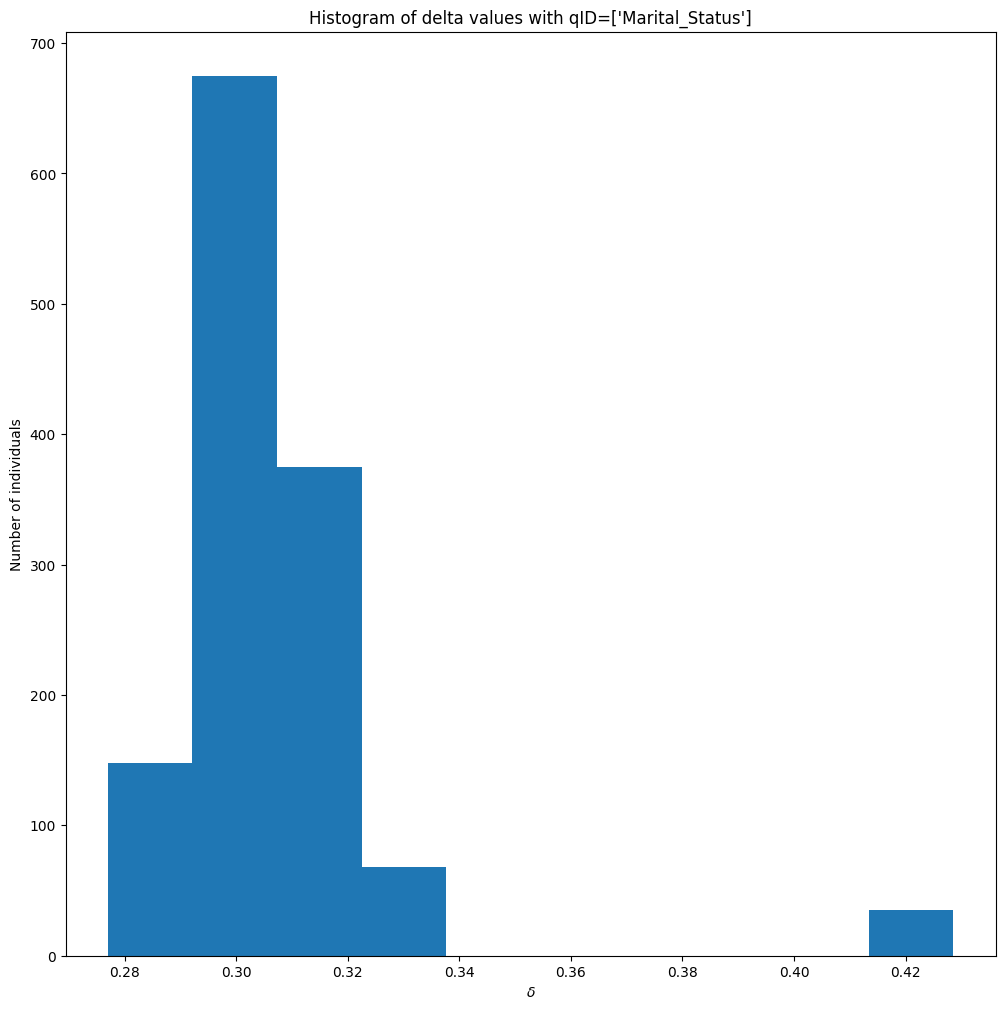

The individuals with delta=delta_min=$0.2770$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
13,Teddy Edouard Barris,1,44,3,2,6,0.277027
26,Finn Avrom Collin,1,70,3,1,2,0.277027
33,Marilyn Toinette Bradly,2,50,3,1,4,0.277027
34,Elwina Sharia Devin,2,64,3,2,2,0.277027
41,Iain Han Bear,1,71,3,1,3,0.277027
...,...,...,...,...,...,...,...
1266,Parwane Lenee Aldo,2,75,3,2,3,0.277027
1273,Engelbart Rawley Caspar,1,65,3,1,4,0.277027
1282,Jana Mead Brent,2,69,3,1,3,0.277027
1284,Reeta Loria Drew,2,51,3,1,4,0.277027


The individuals with delta=delta_max=$0.4286$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
48,Benoite Prudi Beau,2,46,4,2,1,0.428571
81,Zondra Nadya Cyrill,2,62,4,1,4,0.428571
133,Stan Jerri Bennett,1,50,4,1,3,0.428571
204,Vassili Kenyon Ahmed,1,40,4,1,3,0.428571
281,Radcliffe Radcliffe Aube,1,51,4,2,1,0.428571
287,Crysta Darlene Bartlet,2,42,4,1,3,0.428571
288,Valaree Phylys Benjie,2,33,4,2,2,0.428571
301,Arielle Angelia Albrecht,2,73,4,1,3,0.428571
335,Damita Rosario Demetris,2,36,4,1,4,0.428571
371,Niels Horst Andri,1,51,4,1,3,0.428571


In [243]:
__problem = '2c'

try:
    qID = ['Marital_Status']

    print_mk(f'The results of running `delta_Presence` with qID={qID} are `delta_min`=${p2c_delta_min:.4f}$ and `delta_max`=${p2c_delta_max:.4f}$ with the following distribution of delta values:')
    pyplot.subplots(figsize=(12,12))
    pyplot.hist(p2c_identities_deltas.delta, 10)
    pyplot.xlabel("$\\delta$")
    pyplot.ylabel("Number of individuals")
    pyplot.title(f"Histogram of delta values with qID={qID}")
    pyplot.show()
    print_mk(f'The individuals with delta=delta_min=${p2c_delta_min:.4f}$ are:')
    display(p2c_identities_deltas[p2c_identities_deltas.delta == p2c_delta_min])
    print_mk(f'The individuals with delta=delta_max=${p2c_delta_max:.4f}$ are:')
    display(p2c_identities_deltas[p2c_identities_deltas.delta == p2c_delta_max])

except Exception as e:
    safe_print_err(e)

---

## (d) What About Gender?

Use the function `delta_Presence` to calcualte the $\delta$-Presence levels of the individiuals in `identities` with respect to published data `Lab3_Problem2`, assuming only `"Gender"` gets published as a quasi-identifier.

Store the results of your calculations in the variables `p2d_delta_min`, `p2d_delta_max` and `p2d_identities_deltas`, respectively.

Complete the following code snippet with your code:

In [244]:
qID = ['Gender']
# Your solution here
p2d_delta_min, p2d_delta_max, p2d_identities_deltas = delta_Presence(
    Lab3_synthetic_identities, Lab3_Problem2, qID
)

Run the following cell to present the outcomes of your code.

The results of running `delta_Presence` with qID=['Gender'] are `delta_min`=$0.2990$ and `delta_max`=$0.3216$ with the following distribution of delta values:

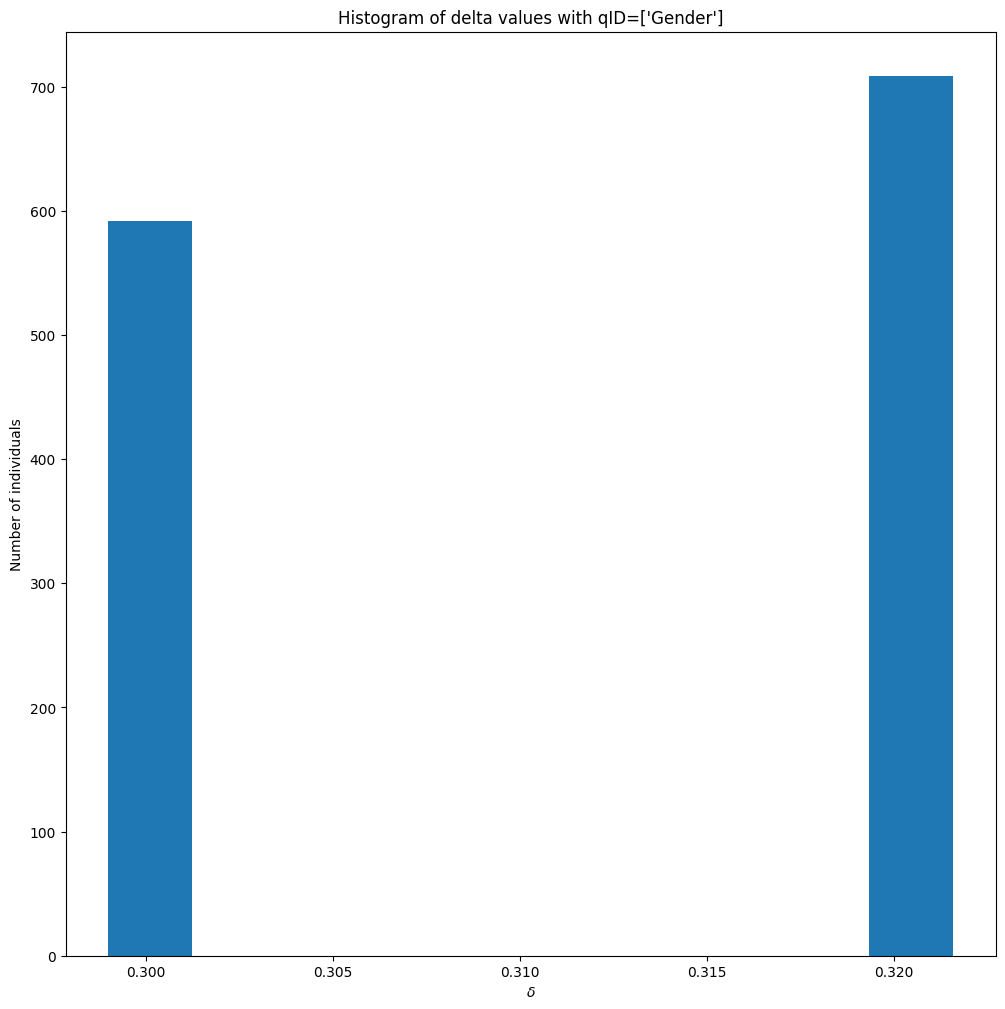

The individuals with delta=delta_min=$0.2990$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
1,Almeria Casandra Artur,2,59,5,1,4,0.298986
3,Mufinella Bebe Aylmer,2,56,2,1,3,0.298986
4,Elsbeth Mandy Berchtold,2,53,1,2,6,0.298986
5,Bessie Clare Claybourne,2,31,5,2,4,0.298986
8,Lebbie Xylia Brant,2,37,1,2,3,0.298986
...,...,...,...,...,...,...,...
1291,Diandra Sarah Carlyle,2,47,1,1,4,0.298986
1292,Betsey Jessalyn Davis,2,66,1,1,3,0.298986
1295,Lorita Karena Domenic,2,31,5,1,4,0.298986
1296,Sonya Marrissa Claus,2,55,5,1,1,0.298986


The individuals with delta=delta_max=$0.3216$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
0,Jerold Washington Billie,1,65,1,2,2,0.32158
2,Percival Jesse Denis,1,20,6,1,3,0.32158
6,Tim Brinkley Derrol,1,26,5,1,4,0.32158
7,Barth Tonnie Cob,1,50,1,1,4,0.32158
10,Floyd Terrance Corwin,1,66,5,2,2,0.32158
...,...,...,...,...,...,...,...
1293,Ludvig Isador Boyd,1,26,1,1,4,0.32158
1294,Ramon Hilbert Abdullah,1,26,6,1,7,0.32158
1297,Chandler Georgie Abram,1,31,6,1,3,0.32158
1298,Chaunce Grove Armando,1,25,5,2,6,0.32158


In [245]:
__problem = '2d'

try:
    qID = ['Gender']

    print_mk(f'The results of running `delta_Presence` with qID={qID} are `delta_min`=${p2d_delta_min:.4f}$ and `delta_max`=${p2d_delta_max:.4f}$ with the following distribution of delta values:')
    pyplot.subplots(figsize=(12,12))
    pyplot.hist(p2d_identities_deltas.delta, 10)
    pyplot.xlabel("$\\delta$")
    pyplot.ylabel("Number of individuals")
    pyplot.title(f"Histogram of delta values with qID={qID}")
    pyplot.show()
    print_mk(f'The individuals with delta=delta_min=${p2d_delta_min:.4f}$ are:')
    display(p2d_identities_deltas[p2d_identities_deltas.delta == p2d_delta_min])
    print_mk(f'The individuals with delta=delta_max=${p2d_delta_max:.4f}$ are:')
    display(p2d_identities_deltas[p2d_identities_deltas.delta == p2d_delta_max])

except Exception as e:
    safe_print_err(e)

---

## (e) More Options

Use the function `delta_Presence` to calcualte the $\delta$-Presence levels of the individiuals in `identities` with respect to published data `Lab3_Problem2`, assuming only `"Gender"` and `"Marital_Status"` get published as quasi-identifiers.

Store the results of your calculations in the variables `p2e_delta_min`, `p2e_delta_max` and `p2e_identities_deltas`, respectively.

Complete the following code snippet with your code:

In [246]:
qID = ['Gender','Marital_Status']
# Your solution here
p2e_delta_min, p2e_delta_max, p2e_identities_deltas = delta_Presence(
    Lab3_synthetic_identities, Lab3_Problem2, qID
)

Run the following cell to present the outcomes of your code.

The results of running `delta_Presence` with qID=['Gender', 'Marital_Status'] are `delta_min`=$0.2714$ and `delta_max`=$0.5294$ with the following distribution of delta values:

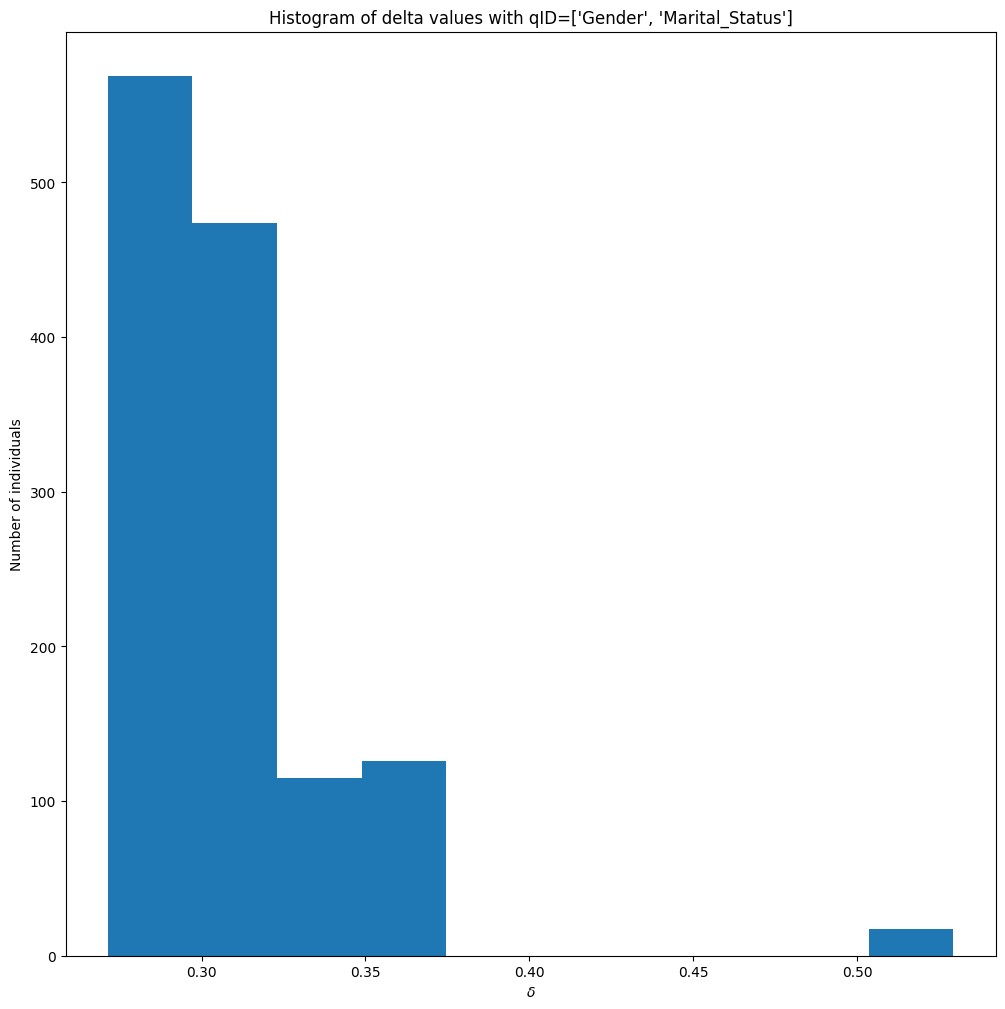

The individuals with delta=delta_min=$0.2714$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
13,Teddy Edouard Barris,1,44,3,2,6,0.271429
26,Finn Avrom Collin,1,70,3,1,2,0.271429
41,Iain Han Bear,1,71,3,1,3,0.271429
55,Blaine Lew Dario,1,40,3,2,3,0.271429
94,Osbourn Sebastiano Chris,1,75,3,1,4,0.271429
...,...,...,...,...,...,...,...
1129,Ingelbert Mordecai Bjorne,1,53,3,2,3,0.271429
1167,Cosmo Joachim Aleck,1,38,3,1,3,0.271429
1180,Wilbur Wood Beale,1,63,3,1,4,0.271429
1190,Hodge Randolf Daffy,1,58,3,1,3,0.271429


The individuals with delta=delta_max=$0.5294$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
133,Stan Jerri Bennett,1,50,4,1,3,0.529412
204,Vassili Kenyon Ahmed,1,40,4,1,3,0.529412
281,Radcliffe Radcliffe Aube,1,51,4,2,1,0.529412
371,Niels Horst Andri,1,51,4,1,3,0.529412
460,Georgia Charles Carson,1,49,4,1,3,0.529412
500,Edgar Barde Aylmer,1,52,4,2,1,0.529412
592,Guthry Praneetf Del,1,50,4,2,2,0.529412
719,Sandy Muhammad Antoine,1,68,4,1,3,0.529412
775,Ashley Ty Demetrius,1,43,4,1,4,0.529412
823,Tymothy Son Carlin,1,29,4,1,1,0.529412


In [247]:
__problem = '2e'

try:
    qID = ['Gender','Marital_Status']

    print_mk(f'The results of running `delta_Presence` with qID={qID} are `delta_min`=${p2e_delta_min:.4f}$ and `delta_max`=${p2e_delta_max:.4f}$ with the following distribution of delta values:')
    pyplot.subplots(figsize=(12,12))
    pyplot.hist(p2e_identities_deltas.delta, 10)
    pyplot.xlabel("$\\delta$")
    pyplot.ylabel("Number of individuals")
    pyplot.title(f"Histogram of delta values with qID={qID}")
    pyplot.show()
    print_mk(f'The individuals with delta=delta_min=${p2e_delta_min:.4f}$ are:')
    display(p2e_identities_deltas[p2e_identities_deltas.delta == p2e_delta_min])
    print_mk(f'The individuals with delta=delta_max=${p2e_delta_max:.4f}$ are:')
    display(p2e_identities_deltas[p2e_identities_deltas.delta == p2e_delta_max])

except Exception as e:
    safe_print_err(e)

---

## (f) Even More Options

Use the function `delta_Presence` to calcualte the $\delta$-Presence levels of the individiuals in `identities` with respect to published data `Lab3_Problem2`, assuming only `"Gender"`, `"Race"` and `"Marital_Status"` get published as quasi-identifiers.

Store the results of your calculations in the variables `p2f_delta_min`, `p2f_delta_max` and `p2f_identities_deltas`, repsectively.

Complete the following code snippet with your code:

In [248]:
qID = ['Gender','Race','Marital_Status']
# Your solution here
p2f_delta_min, p2f_delta_max, p2f_identities_deltas = delta_Presence(
    Lab3_synthetic_identities, Lab3_Problem2, qID
)

Run the following cell to present the outcomes of your code.

The results of running `delta_Presence` with qID=['Gender', 'Race', 'Marital_Status'] are `delta_min`=$0.0000$ and `delta_max`=$0.6667$ with the following distribution of delta values:

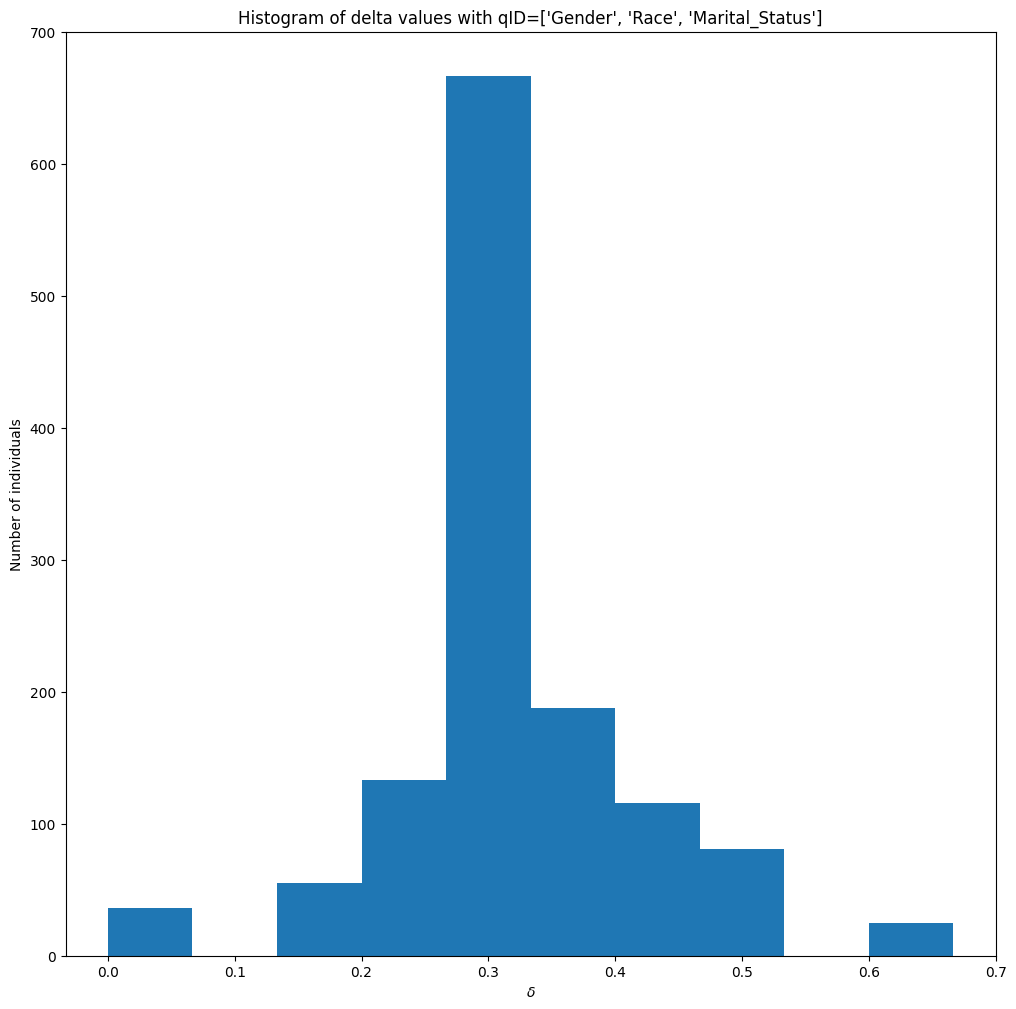

The individuals with delta=delta_min=$0.0000$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
13,Teddy Edouard Barris,1,44,3,2,6,0.0
114,Pablo Eduard Baillie,1,69,3,1,7,0.0
178,Inigo Alphonso Aldrich,1,35,3,1,7,0.0
288,Valaree Phylys Benjie,2,33,4,2,2,0.0
305,Abbie Baillie Antonius,1,55,3,2,6,0.0
331,Georgiamay Pollyanna Alan,2,56,3,2,6,0.0
338,Hamel Rodd Christoph,1,72,3,1,7,0.0
348,Ealasaid Cristy Amadeus,2,64,2,1,4,0.0
362,Francis Jerri Brandy,1,66,3,2,6,0.0
444,Barbee Dolorita Andreas,2,21,5,1,7,0.0


The individuals with delta=delta_max=$0.6667$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
48,Benoite Prudi Beau,2,46,4,2,1,0.666667
493,Gilles Ulric Cam,1,71,3,2,1,0.666667
520,Lind Laryssa Burke,2,27,6,1,7,0.666667
529,Kaye Sibylla Diego,2,40,6,1,7,0.666667
564,Dalton Loren Andie,1,49,3,1,1,0.666667
775,Ashley Ty Demetrius,1,43,4,1,4,0.666667
898,Brooks Gale Bartie,1,62,3,1,1,0.666667
1083,Ola Brigitte Barnabas,2,70,6,1,7,0.666667
1088,Ramsey Stavros Christofer,1,59,4,1,4,0.666667
1168,Gibb Hy Chet,1,53,4,1,4,0.666667


In [249]:
__problem = '2f'

try:
    qID = ['Gender','Race','Marital_Status']

    print_mk(f'The results of running `delta_Presence` with qID={qID} are `delta_min`=${p2f_delta_min:.4f}$ and `delta_max`=${p2f_delta_max:.4f}$ with the following distribution of delta values:')
    pyplot.subplots(figsize=(12,12))
    pyplot.hist(p2f_identities_deltas.delta, 10)
    pyplot.xlabel("$\\delta$")
    pyplot.ylabel("Number of individuals")
    pyplot.title(f"Histogram of delta values with qID={qID}")
    pyplot.show()
    print_mk(f'The individuals with delta=delta_min=${p2f_delta_min:.4f}$ are:')
    display(p2f_identities_deltas[p2f_identities_deltas.delta == p2f_delta_min])
    print_mk(f'The individuals with delta=delta_max=${p2f_delta_max:.4f}$ are:')
    display(p2f_identities_deltas[p2f_identities_deltas.delta == p2f_delta_max])

except Exception as e:
    safe_print_err(e)

---

## (g) Even More Options (2)


Use the function `delta_Presence` to calcualte the $\delta$-Presence levels of the individiuals in `identities` with respect to published data `Lab3_Problem2`, assuming only `"Gender"`, `"Race"`, `"Country_Birth"` and `"Marital_Status"` get published as quasi-identifiers.

Store the results of your calculations in the variables `p2g_delta_min`, `p2g_delta_max` and `p2g_identities_deltas`, respectively.

Complete the following code snippet with your code:

In [250]:
qID = ['Gender','Race','Country_Birth','Marital_Status']
# Your solution here
p2g_delta_min, p2g_delta_max, p2g_identities_deltas = delta_Presence(
    Lab3_synthetic_identities, Lab3_Problem2, qID
)

Run the following cell to present the outcomes of your code.

The results of running `delta_Presence` with qID=['Gender', 'Race', 'Country_Birth', 'Marital_Status'] are `delta_min`=$0.0000$ and `delta_max`=$1.0000$ with the following distribution of delta values:

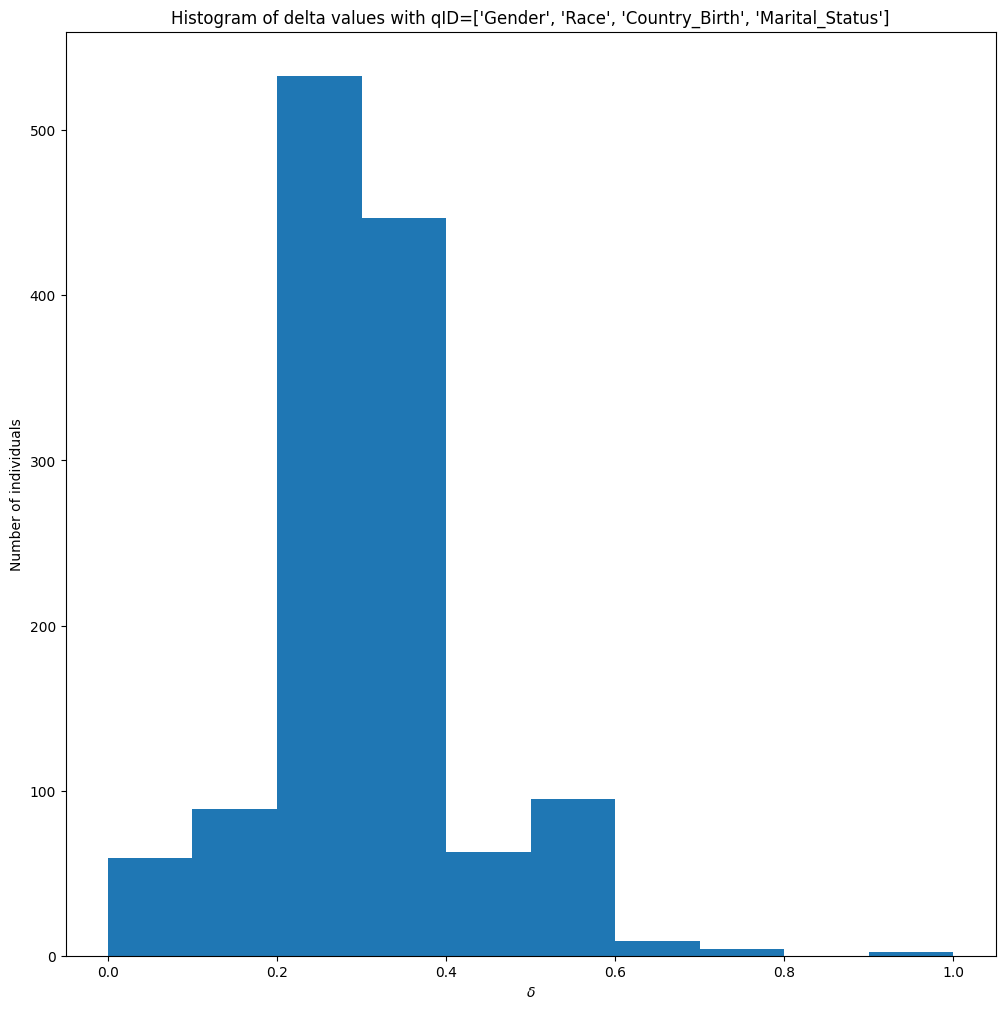

The individuals with delta=delta_min=$0.0000$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
13,Teddy Edouard Barris,1,44,3,2,6,0.0
22,Tia Ilana Brandy,2,29,1,1,6,0.0
114,Pablo Eduard Baillie,1,69,3,1,7,0.0
178,Inigo Alphonso Aldrich,1,35,3,1,7,0.0
285,Glennis Blondy Douglis,2,28,1,1,6,0.0
288,Valaree Phylys Benjie,2,33,4,2,2,0.0
305,Abbie Baillie Antonius,1,55,3,2,6,0.0
311,Dorene Chelsea Andrej,2,35,1,2,7,0.0
331,Georgiamay Pollyanna Alan,2,56,3,2,6,0.0
338,Hamel Rodd Christoph,1,72,3,1,7,0.0


The individuals with delta=delta_max=$1.0000$ are:

,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,delta
493,Gilles Ulric Cam,1,71,3,2,1,1.0
1157,Jackie Wald Arthur,1,62,4,1,2,1.0


In [251]:
__problem = '2g'

try:
    qID = ['Gender','Race','Country_Birth','Marital_Status']

    print_mk(f'The results of running `delta_Presence` with qID={qID} are `delta_min`=${p2g_delta_min:.4f}$ and `delta_max`=${p2g_delta_max:.4f}$ with the following distribution of delta values:')
    pyplot.subplots(figsize=(12,12))
    pyplot.hist(p2g_identities_deltas.delta, 10)
    pyplot.xlabel("$\\delta$")
    pyplot.ylabel("Number of individuals")
    pyplot.title(f"Histogram of delta values with qID={qID}")
    pyplot.show()
    print_mk(f'The individuals with delta=delta_min=${p2g_delta_min:.4f}$ are:')
    display(p2g_identities_deltas[p2g_identities_deltas.delta == p2g_delta_min])
    print_mk(f'The individuals with delta=delta_max=${p2g_delta_max:.4f}$ are:')
    display(p2g_identities_deltas[p2g_identities_deltas.delta == p2g_delta_max])

except Exception as e:
    safe_print_err(e)

---

# Problem 3

In this problem we will briefly investigate differential privacy.

## (a) Visualize Laplace
Throughout this problem, we will use the Laplace mechanism to achieve Differential Privacy. We will use the function `numpy.random.laplace(mu, b, n)` that generates a column vector of `n` random numbers independently distributed according to the distribution $Laplace(\mu = mu, b)$.

Write code that generates the following variables:
- `p3a_laplace_samples`: Generate $100,000$ (i.e., $100k$) samples distributed according to the distribution $Laplace(0,2)$.
- `p3a_laplace_pdf`: Using the x values `p3a_x = numpy.arange(-25.0, 25.1, 0.1)`, generate the Laplace PDF function values of the same distribution $Laplace(0,2)$:
$$
f(x) = \frac{1}{2\cdot b} \cdot exp\left(-\frac{\mid x-mu \mid}{b}\right)
$$
with $\mu=0$ and $b=2$. You may either evaluate this function directly, or use `scipy.stats.laplace.pdf()`.

Complete the following code snippet with your code:

In [252]:
p3a_x = numpy.arange(-20.0, 20.1, 0.1)

# Your solution here

mu = 0
b = 2
n = 100000

p3a_laplace_samples = numpy.random.laplace(mu, b, n)

p3a_laplace_pdf = 1/(2*b) * numpy.exp(-numpy.abs(p3a_x - mu)/b)

Run the following cell to present the outcomes of your code.

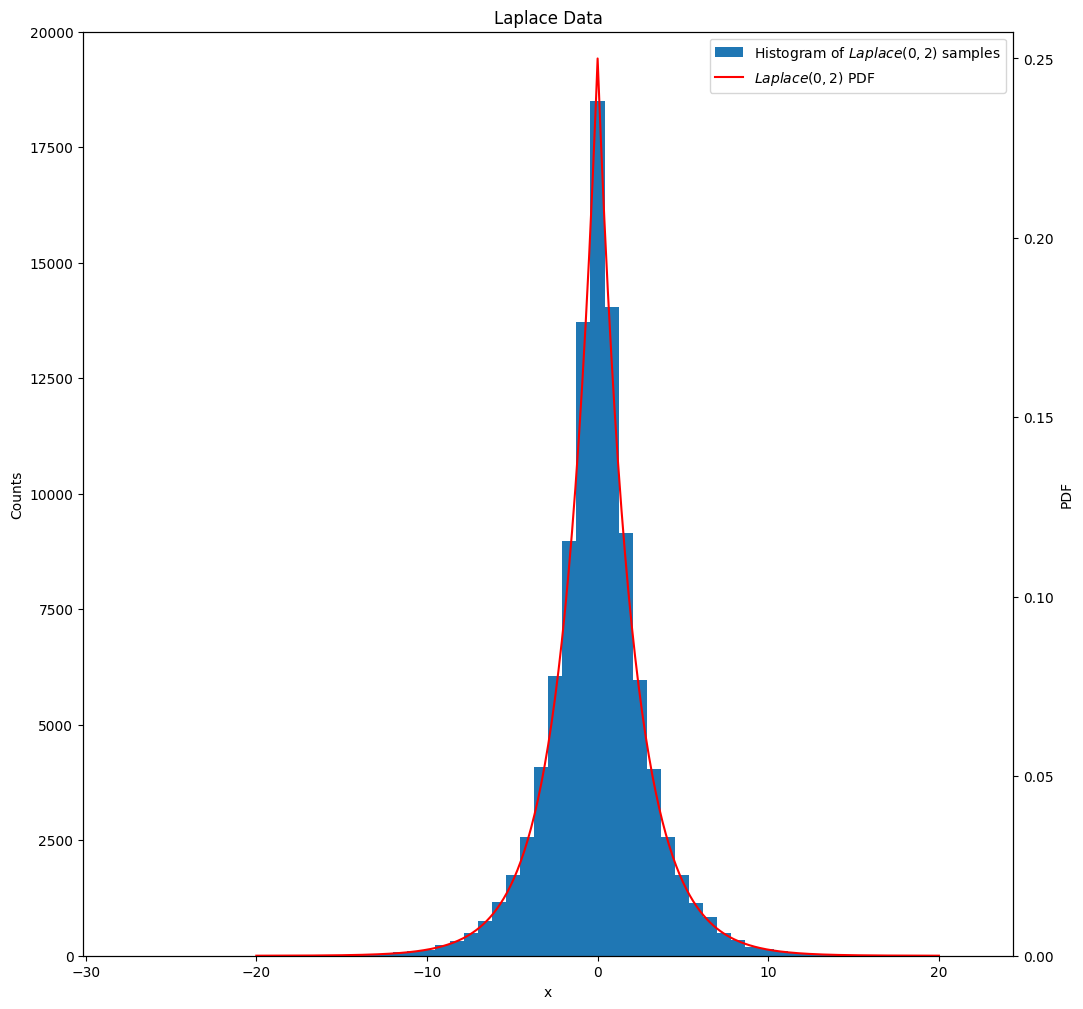

In [253]:
__problem = '3a'

try:
    p3a_x = numpy.arange(-20.0, 20.1, 0.1)

    pyplot.subplots(figsize=(12,12))
    p3a_lplc_hist_fh = pyplot.hist(p3a_laplace_samples, 60)
    pyplot.ylabel('Counts')
    pyplot.xlabel('x');
    ax1 = pyplot.gca()
    curr_ylim = ax1.get_ylim()
    
    new_ylim = [0, max(numpy.ceil([17/2, curr_ylim[1]/2000])*2000)]

    pyplot.ylim(new_ylim)

    ax2 = ax1.twinx()
    p3a_lplc_pdf_fh = pyplot.plot(p3a_x,p3a_laplace_pdf,'r')
    new_ylim = [0, 0.25/curr_ylim[1]*new_ylim[1]]
    pyplot.ylim(new_ylim)

    pyplot.legend([p3a_lplc_hist_fh[2]] + p3a_lplc_pdf_fh, ['Histogram of $Laplace(0,2)$ samples', '$Laplace(0,2)$ PDF']);
    pyplot.ylabel('PDF')
    pyplot.title('Laplace Data')
    pyplot.show()
    
except Exception as e:
    safe_print_err(e)

---

## (b) Adding Laplace Noise to Query Output
In this part, we are concerned with the query:
<div class="alert alert-block alert-info">
Query 3b: Calculate the number of people with all of the following features:<br>
<ol>
    <li> Gender = Male<br></li>
    <li> LDL + HDL Cholesterol > 140</li>
    <li> Total Cholesterol &lt; 190</li>
    <li> Systolic Blood Pressure &gt; 130</li>
    <li> Average Alcohol Consumption &gt; 1</li>
</ol>
</div>
which can be implemented with the following code (without any Differential Privacy)

In [254]:
def p3b_query(data):
    """Calcualte the result of Query 3b
    
    Parameters
    ----------
    data : pandas.DataFrame
        A data frame containing at least the following columns:
            - Gender
            - HDL_Cholesterol
            - LDL_Cholesterol
            - Total_Cholesterol
            - Sys_Blood_Pressure
            - Alcohol_Average
    
    Returns
    -------
    result : list
        a list with a single number containing the result of the query
    """
    
    query = (data.Gender == 1) & \
        (data.HDL_Cholesterol + data.LDL_Cholesterol > 140) & \
        (data.Total_Cholesterol < 190) & \
        (data.Sys_Blood_Pressure > 130) & \
        (data.Alcohol_Average > 1)
    return [sum(query)]

print_mk(f'The true output of the query is: {p3b_query(Lab3_Data)}\n')

The true output of the query is: [44]


We would like to achieve $\epsilon$-Differential Privacy for this query.

Implement the Laplace Mechanism for `p3b_query` in the function `p3b_query_dp`. The function `p3b_query_dp` takes the following arguments:
- `data`: The dataset from which to calculate the Differentially Private response.
- `epsilon`: The $\epsilon$ level for Differential Privacy

The function outputs:
- `diff_priv_query_answer`: The $\epsilon$-Differentially Private response to the query using the Laplace Mechanism.

In your implementation, you should use the necessary mean $\mu$ and the smallest value of the parameter $b$ for the Laplace mechanism to ensure that the output of this query will always be $\epsilon$-Differentially Private (regarless of the input database, or the conditions on the query).

Complete the following code snippet with your code:

In [255]:
def p3b_query_dp(data, epsilon):
    # Your solution here

	mu = 0
	b = 1
    
	return p3b_query(data) + numpy.random.laplace(mu, b/epsilon, 1)[0]

Run the following cell to demonstrate the outcomes of your code.

In [256]:
__problem = '3b'

try:
    epsilon=0.2
    p4b_diff_priv_query_answer = p3b_query_dp(Lab3_Data, epsilon)

    # This print statement is to produce the results
    print_mk(f'The {epsilon}-Differentially Private output of the query is: {p4b_diff_priv_query_answer}\n')

except Exception as e:
    safe_print_err(e)

The 0.2-Differentially Private output of the query is: [52.67803417]


---

## (c) Histogram Queries: Laplace Mechanism

In this part, we are concerned with the query:
<div class="alert alert-block alert-info">
Query 3c: Calculate a non-normalized histogram of people with all of the following features
<ol>
    <li> Gender = Male</li>
    <li> LDL + HDL Cholesterol &gt; 140</li>
    <li> Systolic Blood Pressure &gt; 130</li>
    <li> Average Alcohol Consumption &gt; 1</li>
</ol>
Using Total Cholesterol bins provided by the user<br>
</div>

which can be implemented with the following code (without any Differential Privacy)

In [257]:
def p3c_query(data, bins):
    """Calcualte the result of Query 3c
    
    Parameters
    ----------
    data : pandas.DataFrame
        A data frame containing at least the following columns:
            - Gender
            - HDL_Cholesterol
            - LDL_Cholesterol
            - Total_Cholesterol
            - Sys_Blood_Pressure
            - Alcohol_Average
    bins : list
        The list of bins boundaries as described in numpy.histogram
    
    Returns
    -------
    result : list
        a list containing the result of the query, one count for each bin described in bins.
    """
    
    query_i = (data.Gender == 1) & \
        (data.HDL_Cholesterol + Lab3_Data.LDL_Cholesterol > 140) & \
        (data.Sys_Blood_Pressure > 130) & \
        (data.Alcohol_Average > 1)
    f_query = numpy.histogram(data.Total_Cholesterol[query_i], bins=bins)[0]
    return f_query

# Example with bins [130, 190, 250, 310, 370]
bins = range(130,371,60)

results = p3c_query(Lab3_Data, bins)

to_print_temp = pandas.DataFrame({"Bin Start (inclusive)": bins[:-1], "Bin End (exlusive)": bins[1:], "Count": results})

print_mk(f'The true output of the query on `Lab3_Data` with bins={list(bins)} is:')
print_mk(f'{to_print_temp.to_markdown()}')

The true output of the query on `Lab3_Data` with bins=[130, 190, 250, 310, 370] is:

|    |   Bin Start (inclusive) |   Bin End (exlusive) |   Count |
|---:|------------------------:|---------------------:|--------:|
|  0 |                     130 |                  190 |      44 |
|  1 |                     190 |                  250 |      74 |
|  2 |                     250 |                  310 |      21 |
|  3 |                     310 |                  370 |       1 |

We would like to achieve $\epsilon$-Differential Privacy for this query.

Implement the Laplace Mechanism for `p3c_query` in the function `p3c_query_dp`. The function `p3c_query_dp` takes the following arguments:
- `data`: The dataset from which to calculate the Differentially Private response.
- `bins`: The list of bins boundaries as described in numpy.histogramThe list of bins boundaries as described in `numpy.histogram()`
- `epsilon`: The $\epsilon$ level for Differential Privacy

The function outputs:
- `diff_priv_query_answer`: The $\epsilon$-Differentially Private response to the query using the Laplace Mechanism.

In your implementation, you should use the necessary mean $\mu$ and the smallest value of the parameter $b$ for the Laplace mechanism to ensure that the output of this query will always be $\epsilon$-Differentially Private (regarless of the input database, or the conditions on the query).

Complete the following code snippet with your code:

In [258]:
def p3c_query_dp(data, bins, epsilon):
    # Your solution here
    
    mu = 0
    b = 1
    
    return p3c_query(data, bins) + numpy.random.laplace(mu, b/epsilon, len(bins)-1)


Run the following cell to demonstrate the outcomes of your code.

In [259]:
__problem = '3c'

try:
    epsilon=0.2
    bins = range(130,371,60)
    p4c_diff_priv_query_answer = p3c_query_dp(Lab3_Data, bins, epsilon)

    to_print_temp = pandas.DataFrame({"Bin Start (inclusive)": bins[:-1], "Bin End (exlusive)": bins[1:], "Count": p4c_diff_priv_query_answer})

    print_mk(f'The {epsilon}-differentially private output of the query on `Lab3_Data` with bins={list(bins)} is:')
    print_mk(f'{to_print_temp.to_markdown()}')

except Exception as e:
    safe_print_err(e)

The 0.2-differentially private output of the query on `Lab3_Data` with bins=[130, 190, 250, 310, 370] is:

|    |   Bin Start (inclusive) |   Bin End (exlusive) |    Count |
|---:|------------------------:|---------------------:|---------:|
|  0 |                     130 |                  190 | 37.3103  |
|  1 |                     190 |                  250 | 61.9593  |
|  2 |                     250 |                  310 | 17.2724  |
|  3 |                     310 |                  370 |  0.60225 |

---

# Problem 4

In your report, list all individuals and sources that you consulted with while working on this assignment.

Group members: Victoria Kolsing, Nikolai Koop, Edvard Soerby

ChatGPT/Copilot was used to understand some concepts of the tasks better.